# 입문자를 위한, 파이썬/R 데이터 분석  

]

## Today's mission

- FDR(FinanceDataReader)를 통한 상장종목 수집
- 한국거래소(KRX) 전체 종목 분석
- FDR를 통한 개별 종목 데이터 수집 및 분석 / 과학적 기수법

]

## 한국거래소(KRX) 전체 종목 분석
* Pandas Cheat Sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* FinanceDataReader를 통한 KRX 전체 종목 수집
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## ⚠️ 주의할 점 ⚠️ 
* 강좌의 분석내용과 여러분의 실습 결과는 시점의 차이로 빈도수 등의 결과값이 다르게 나옵니다.



## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import seaborn as sns
import numpy as np

## FinanceDataReader 로 수집한 전체 종목 불러오기

* 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
* https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [5]:
# 이전 강좌에서 to_csv로 저장해둔 krx.csv 파일을 pd.read_csv 로 불러옵니다.
df = pd.read_csv("data_work/krx.csv")
df.shape

(7874, 10)

In [6]:
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7869,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7870,437550,KOSPI,히어로즈 글로벌리츠이지스액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7871,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7872,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 일부 데이터만 가져오기

In [7]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head(1)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시


In [8]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
7872,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7873,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [12]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다. 
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample(3)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1110,58HK59,KOSPI,KBHK59SK텔레콤풋,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5660,101670,KOSDAQ,코리아에스이,"구조용 금속제품, 탱크 및 증기발생기 제조업","영구앵커,교량용케이블,타이케이블",2008-07-15,12월,남홍기,NaN,경기도
7718,052690,KOSPI,한전기술,"건축기술, 엔지니어링 및 관련 기술 서비스업",원자력발전소 설계 등,2009-12-14,12월,김성암,http://www.kepco-enc.com,경상북도


## 데이터 요약하기

In [13]:
# info 로 요약 데이터를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7874 entries, 0 to 7873
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          7874 non-null   object
 1   Market          7874 non-null   object
 2   Name            7874 non-null   object
 3   Sector          2535 non-null   object
 4   Industry        2519 non-null   object
 5   ListingDate     2535 non-null   object
 6   SettleMonth     2535 non-null   object
 7   Representative  2535 non-null   object
 8   HomePage        2373 non-null   object
 9   Region          2534 non-null   object
dtypes: object(10)
memory usage: 615.3+ KB


In [14]:
# describe 로 기술통계값을 봅니다.
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,7874,7874,7874,2535,2519,2535,2535,2535,2373,2534
unique,7874,3,7874,161,2351,1882,9,2412,2351,22
top,060310,KOSPI,3S,소프트웨어 개발 및 공급업,기업인수합병,1976-06-30,12월,-,http://www.ibks.com,서울특별시
freq,1,6146,1,156,30,8,2475,5,3,1034


In [15]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

Symbol            7874
Market               3
Name              7874
Sector             161
Industry          2351
ListingDate       1882
SettleMonth          9
Representative    2412
HomePage          2351
Region              22
dtype: int64

In [16]:
# index 값 보기
df.index

RangeIndex(start=0, stop=7874, step=1)

In [17]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [18]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '김세완', 'http://www.3sref.com',
        '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현, 손삼달',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['419890', 'KOSPI', '히어로즈 단기채권ESG액티브', ..., nan, nan, nan],
       ['429870', 'KOSPI', '히어로즈 리츠이지스액티브', ..., nan, nan, nan],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

In [19]:
print(type(df.values))

<class 'numpy.ndarray'>


## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [20]:
# Name 컬럼 하나만 가져옵니다.
df["Name"]

0                     3S
1                 AJ네트웍스
2                  AK홀딩스
3                 APS홀딩스
4                  AP시스템
              ...       
7869     히어로즈 TDF2050액티브
7870    히어로즈 글로벌리츠이지스액티브
7871     히어로즈 단기채권ESG액티브
7872       히어로즈 리츠이지스액티브
7873                  힘스
Name: Name, Length: 7874, dtype: object

In [21]:
# df["Name"] 의 type을 봅니다.
type(df["Name"])

pandas.core.series.Series

In [22]:
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7869,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7870,437550,KOSPI,히어로즈 글로벌리츠이지스액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7871,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7872,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# 0번째 행만 가져옵니다. 행인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[2]

Symbol                                   006840
Market                                    KOSPI
Name                                      AK홀딩스
Sector                                   기타 금융업
Industry                                   지주사업
ListingDate                          1999-08-11
SettleMonth                                 12월
Representative                채형석, 이석주(각자 대표이사)
HomePage          http://www.aekyunggroup.co.kr
Region                                    서울특별시
Name: 2, dtype: object

In [24]:
# df.loc[0] 의 type을 봅니다.
type(df.loc[0])

pandas.core.series.Series

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [25]:
# df 변수의 타입을 봅니다.
type(df)

pandas.core.frame.DataFrame

In [26]:
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [30]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다. 
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요. 
df[["Symbol", "Name"]]#.head()  # 오류 발생
# df[["Code", "Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템
...,...,...
7869,435550,히어로즈 TDF2050액티브
7870,437550,히어로즈 글로벌리츠이지스액티브
7871,419890,히어로즈 단기채권ESG액티브
7872,429870,히어로즈 리츠이지스액티브


In [31]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
#df.loc[0, 3, 5, 7]    # 오류 발생
df.loc[[0, 3, 5, 7]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
7869,히어로즈 TDF2050액티브
7870,히어로즈 글로벌리츠이지스액티브
7871,히어로즈 단기채권ESG액티브
7872,히어로즈 리츠이지스액티브


In [33]:
type(df[["Name"]])

pandas.core.frame.DataFrame

### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [34]:
# 행과 열 함께 가져오기
# .loc[행, 열]
#df.Name
df['Name'][0]

'3S'

In [35]:
# .loc[행, 열]
df.loc[0, "Name"]

'3S'

In [36]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0, 1, 2], "Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [38]:
# 여러개의 행과 여러개의 컬럼 가져오기
# .loc[행, 열]
# df.loc[[0, 1, 2], ["Code", "Name"]]
df.loc[[0, 1, 2], ["Symbol", "Name"]]

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [41]:
# 카카오를 찾습니다.
df["Name"] == "카카오"

0       False
1       False
2       False
3       False
4       False
        ...  
7869    False
7870    False
7871    False
7872    False
7873    False
Name: Name, Length: 7874, dtype: bool

In [42]:
df[df["Name"] == "카카오"]
#df["Name"]                 # Step.1
#df["Name"]=="흥아해운"     # Step.2
#df[df["Name"]=="흥아해운"] # Step.3

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5589,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"남궁훈, 홍은택 각자 대표이사",http://www.kakaocorp.com,제주특별자치도


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [43]:
# 판다스 조건식 조합
# and => &
# or => |

In [44]:
#df["Region"] == "서울특별시"

In [46]:
# (예시) 서울특별시에 소재지(조건1)를 두고 있는 
# KOSPI 종목(조건2)의 종목명(컬럼1)과 심볼(컬럼2)을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
#condition1 = df["Region"] == "서울특별시"
condition2 = df["Market"] == "KOSPI"
# df.loc[condition2,["Name", "Code", "Market"]]
df.loc[condition2,["Name", "Symbol", "Market"]]

,Name,Symbol,Market
1,AJ네트웍스,095570,KOSPI
2,AK홀딩스,006840,KOSPI
6,ARIRANG 200,152100,KOSPI
7,ARIRANG 200동일가중,295820,KOSPI
8,ARIRANG 200선물레버리지,253150,KOSPI
...,...,...,...
7868,히어로즈 TDF2040액티브,435540,KOSPI
7869,히어로즈 TDF2050액티브,435550,KOSPI
7870,히어로즈 글로벌리츠이지스액티브,437550,KOSPI
7871,히어로즈 단기채권ESG액티브,419890,KOSPI


In [47]:
# 또는
# df.loc[(df["Market"] == "KOSPI"), ["Name", "Code", "Market"]]
df.loc[(df["Market"] == "KOSPI"), ["Name", "Symbol", "Market"]]

,Name,Symbol,Market
1,AJ네트웍스,095570,KOSPI
2,AK홀딩스,006840,KOSPI
6,ARIRANG 200,152100,KOSPI
7,ARIRANG 200동일가중,295820,KOSPI
8,ARIRANG 200선물레버리지,253150,KOSPI
...,...,...,...
7868,히어로즈 TDF2040액티브,435540,KOSPI
7869,히어로즈 TDF2050액티브,435550,KOSPI
7870,히어로즈 글로벌리츠이지스액티브,437550,KOSPI
7871,히어로즈 단기채권ESG액티브,419890,KOSPI


## 파생변수 만들기

In [50]:
# fdr에서는 날짜형 제공했지만 저장 및 읽어오면서 문자형으로 변환
df["ListingDate"]

0       2002-04-23
1       2015-08-21
2       1999-08-11
3       2001-12-04
4       2017-04-07
           ...    
7869           NaN
7870           NaN
7871           NaN
7872           NaN
7873    2017-07-20
Name: ListingDate, Length: 7874, dtype: object

In [54]:
# pd.to_datetime 을 통해 데이터의 타입을 변환합니다.
df["ListingDate"] = pd.to_datetime(df["ListingDate"])
df["ListingDate"]

0      2002-04-23
1      2015-08-21
2      1999-08-11
3      2001-12-04
4      2017-04-07
          ...    
7869          NaT
7870          NaT
7871          NaT
7872          NaT
7873   2017-07-20
Name: ListingDate, Length: 7874, dtype: datetime64[ns]

In [52]:
df["ListingDate"].dt.day #요일 weekday / .year / .month / .day

0       23.0
1       21.0
2       11.0
3        4.0
4        7.0
        ... 
7869     NaN
7870     NaN
7871     NaN
7872     NaN
7873    20.0
Name: ListingDate, Length: 7874, dtype: float64

In [53]:
# ListingYear 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year
df["ListingYear"]

0       2002.0
1       2015.0
2       1999.0
3       2001.0
4       2017.0
         ...  
7869       NaN
7870       NaN
7871       NaN
7872       NaN
7873    2017.0
Name: ListingYear, Length: 7874, dtype: float64

In [55]:
df[["ListingDate", "ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

In [56]:
# nan은 not a number의 약자로 결측치를 의미합니다.
type(np.nan)

float

In [58]:
df["ListingDate"]
type(df["ListingDate"][7306])

pandas._libs.tslibs.nattype.NaTType

## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 데이터 시각화를 위한 폰트설정

In [59]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [60]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'AppleGothic'

In [61]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_2314/1191464808.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [ ]:
### Linux
# import matplotlib.pyplot as plt
# plt.rcParams["font.family"] = 'NanumGothic'

### 폰트 설정 확인하기

<Axes: title={'center': '한글폰트'}>

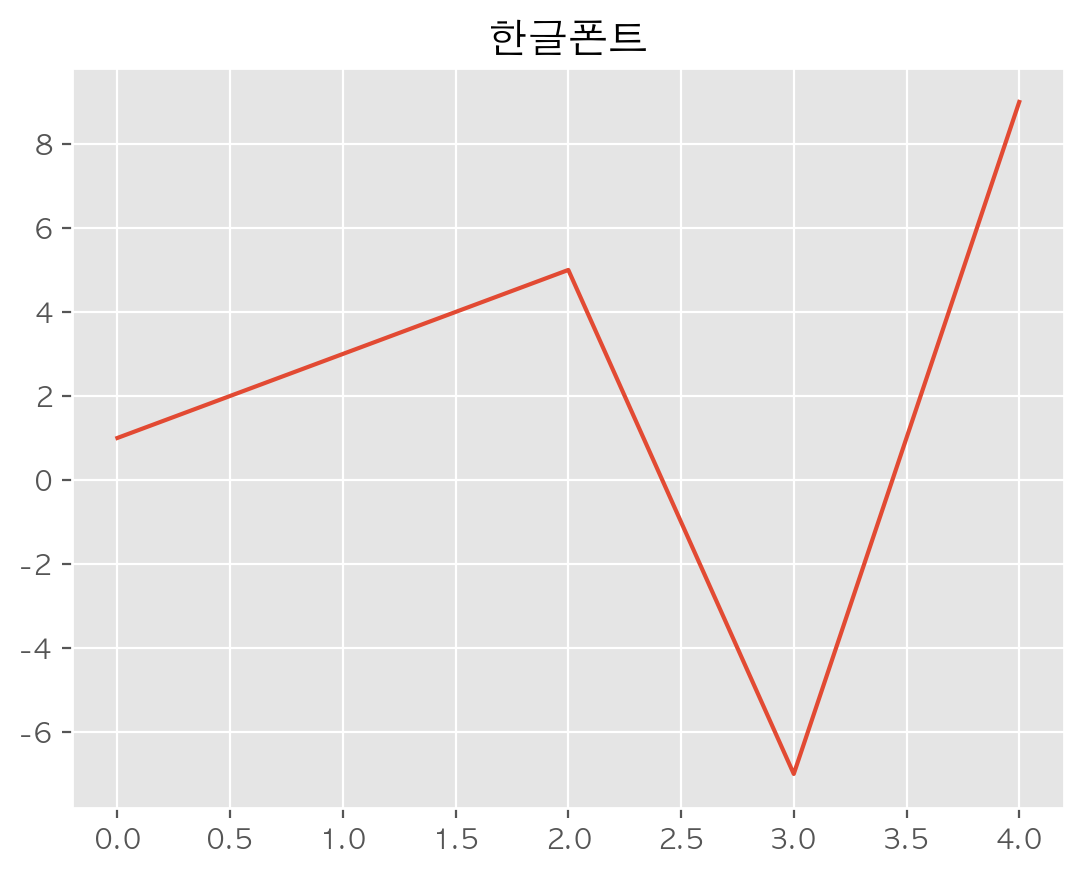

In [62]:
# 한글폰트 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market (한국의 주식시장)
 - 참고 : http://open.krx.co.kr/contents/OPN/01/01010101/OPN01010101.jsp
 - 상장요건 : https://terms.naver.com/entry.naver?docId=2065919&cid=42107&categoryId=42107
 - DART : http://dart.fss.or.kr/

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [63]:
# Market column에 어떤 데이터들이 있는지 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [64]:
df["Market"].value_counts()

Market
KOSPI     6146
KOSDAQ    1603
KONEX      125
Name: count, dtype: int64

<Axes: ylabel='Market'>

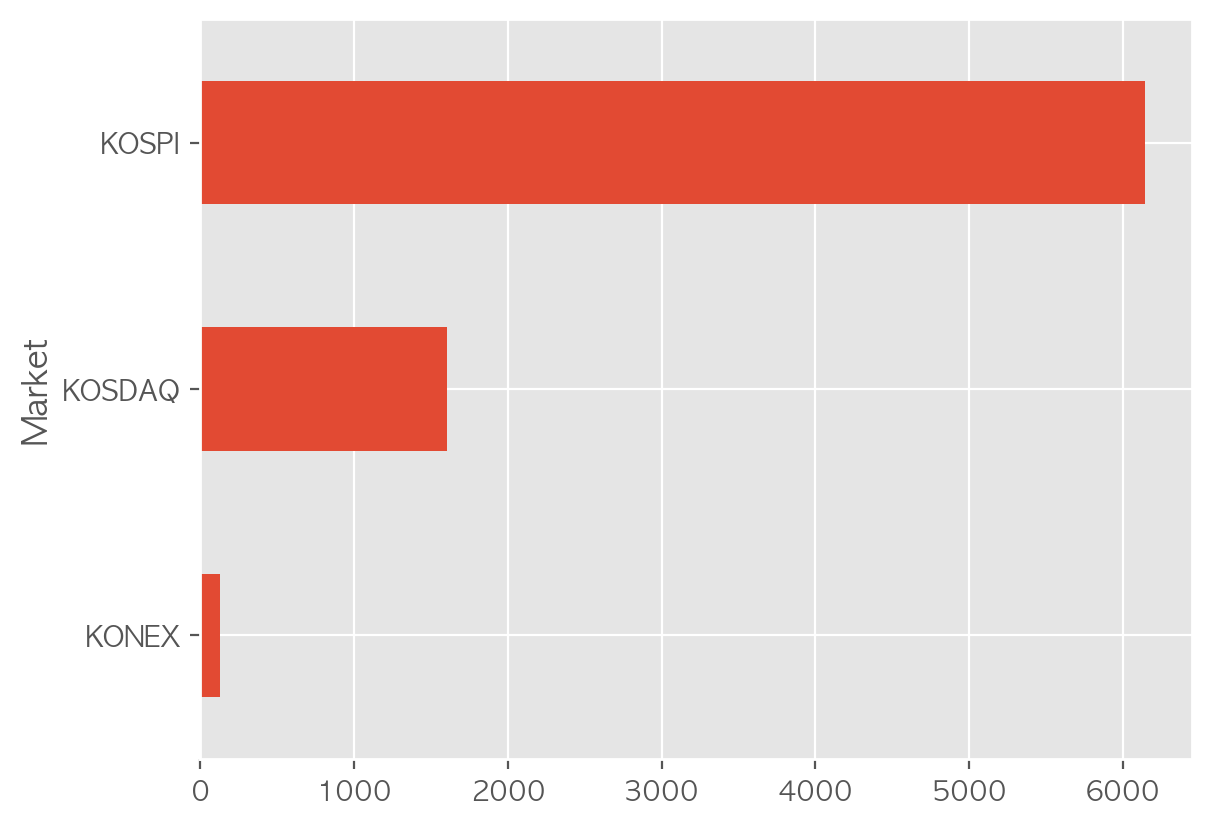

In [100]:
df["Market"].value_counts().sort_values().plot.barh()

<Axes: xlabel='count', ylabel='Market'>

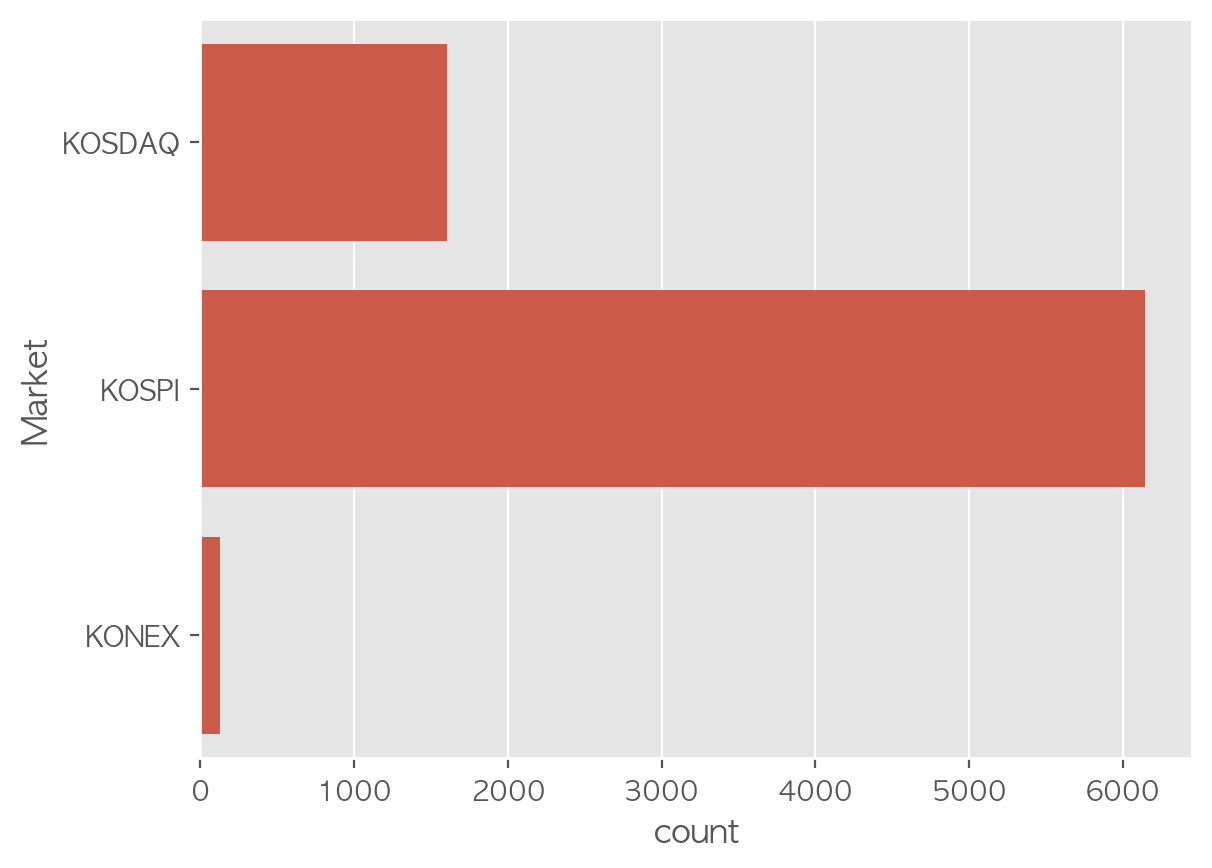

In [71]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df, y="Market")

### Sector

참고 (GICS) : https://pgyinfo.tistory.com/168

In [74]:
df["Sector"].value_counts()

Sector
소프트웨어 개발 및 공급업       156
특수 목적용 기계 제조업        153
전자부품 제조업             127
의약품 제조업               98
자동차 신품 부품 제조업         95
                    ... 
기타 비금속광물 광업            1
의복 액세서리 제조업            1
악기 제조업                 1
인형,장난감 및 오락용품 제조업      1
해체, 선별 및 원료 재생업        1
Name: count, Length: 161, dtype: int64

In [78]:
df['Sector'].unique()

array(['전자부품 제조업', '산업용 기계 및 장비 임대업', '기타 금융업', '특수 목적용 기계 제조업',
       '통신 및 방송 장비 제조업', nan, '종합 소매업', '기계장비 및 관련 물품 도매업', '봉제의복 제조업',
       '자동차 신품 부품 제조업', '영화, 비디오물, 방송프로그램 제작 및 배급업', '텔레비전 방송업',
       '자연과학 및 공학 연구개발업', '도로 화물 운송업', '기타 식품 제조업', '음·식료품 및 담배 도매업',
       '의약품 제조업', '신탁업 및 집합투자업', '건물설비 설치 공사업', '기타 화학제품 제조업',
       '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '금융 지원 서비스업', '보험업', '반도체 제조업',
       '상품 중개업', '건물 건설업', '토목 건설업', '일차전지 및 축전지 제조업', '고무제품 제조업',
       '1차 비철금속 제조업', '1차 철강 제조업', '기타 전문 도매업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '부동산 임대 및 공급업', '생활용품 도매업',
       '일반 목적용 기계 제조업', '소프트웨어 개발 및 공급업', '기타 섬유제품 제조업',
       '유원지 및 기타 오락관련 서비스업', '상품 종합 도매업', '전기 및 통신 공사업', '석유 정제품 제조업',
       '선박 및 보트 건조업', '기타 비금속광물 광업', '의료용품 및 기타 의약 관련제품 제조업',
       '건축기술, 엔지니어링 및 관련 기술 서비스업', '해상 운송업', '합성고무 및 플라스틱 물질 제조업',
       '영상 및 음향기기 제조업', '오디오물 출판 및 원판 녹음업', '유리 및 유리제품 제조업',
       '시멘트, 석회, 플라스터 및 그 제품 제조업', '폐기물 처리업', '기초 화학물질 제조업',
       '기초 의약물질 및 생물학적 제제 제조업', '

In [80]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
sector_count_top = df["Sector"].value_counts().head(30)
sector_count_top

Sector
소프트웨어 개발 및 공급업                           156
특수 목적용 기계 제조업                            153
전자부품 제조업                                 127
의약품 제조업                                   98
자동차 신품 부품 제조업                             95
기타 금융업                                    93
기타 화학제품 제조업                               93
금융 지원 서비스업                                87
통신 및 방송 장비 제조업                            70
반도체 제조업                                   61
자연과학 및 공학 연구개발업                           61
1차 철강 제조업                                 58
의료용 기기 제조업                                56
플라스틱제품 제조업                                46
일반 목적용 기계 제조업                             45
기초 화학물질 제조업                               43
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   41
기초 의약물질 및 생물학적 제제 제조업                     41
기타 전문 도매업                                 38
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         37
기타 식품 제조업                                 34
영화, 비디오물, 방송프로그램 제작 및 배급업                 31
의료용

<Axes: title={'center': 'Sector 빈도수'}, ylabel='Sector'>

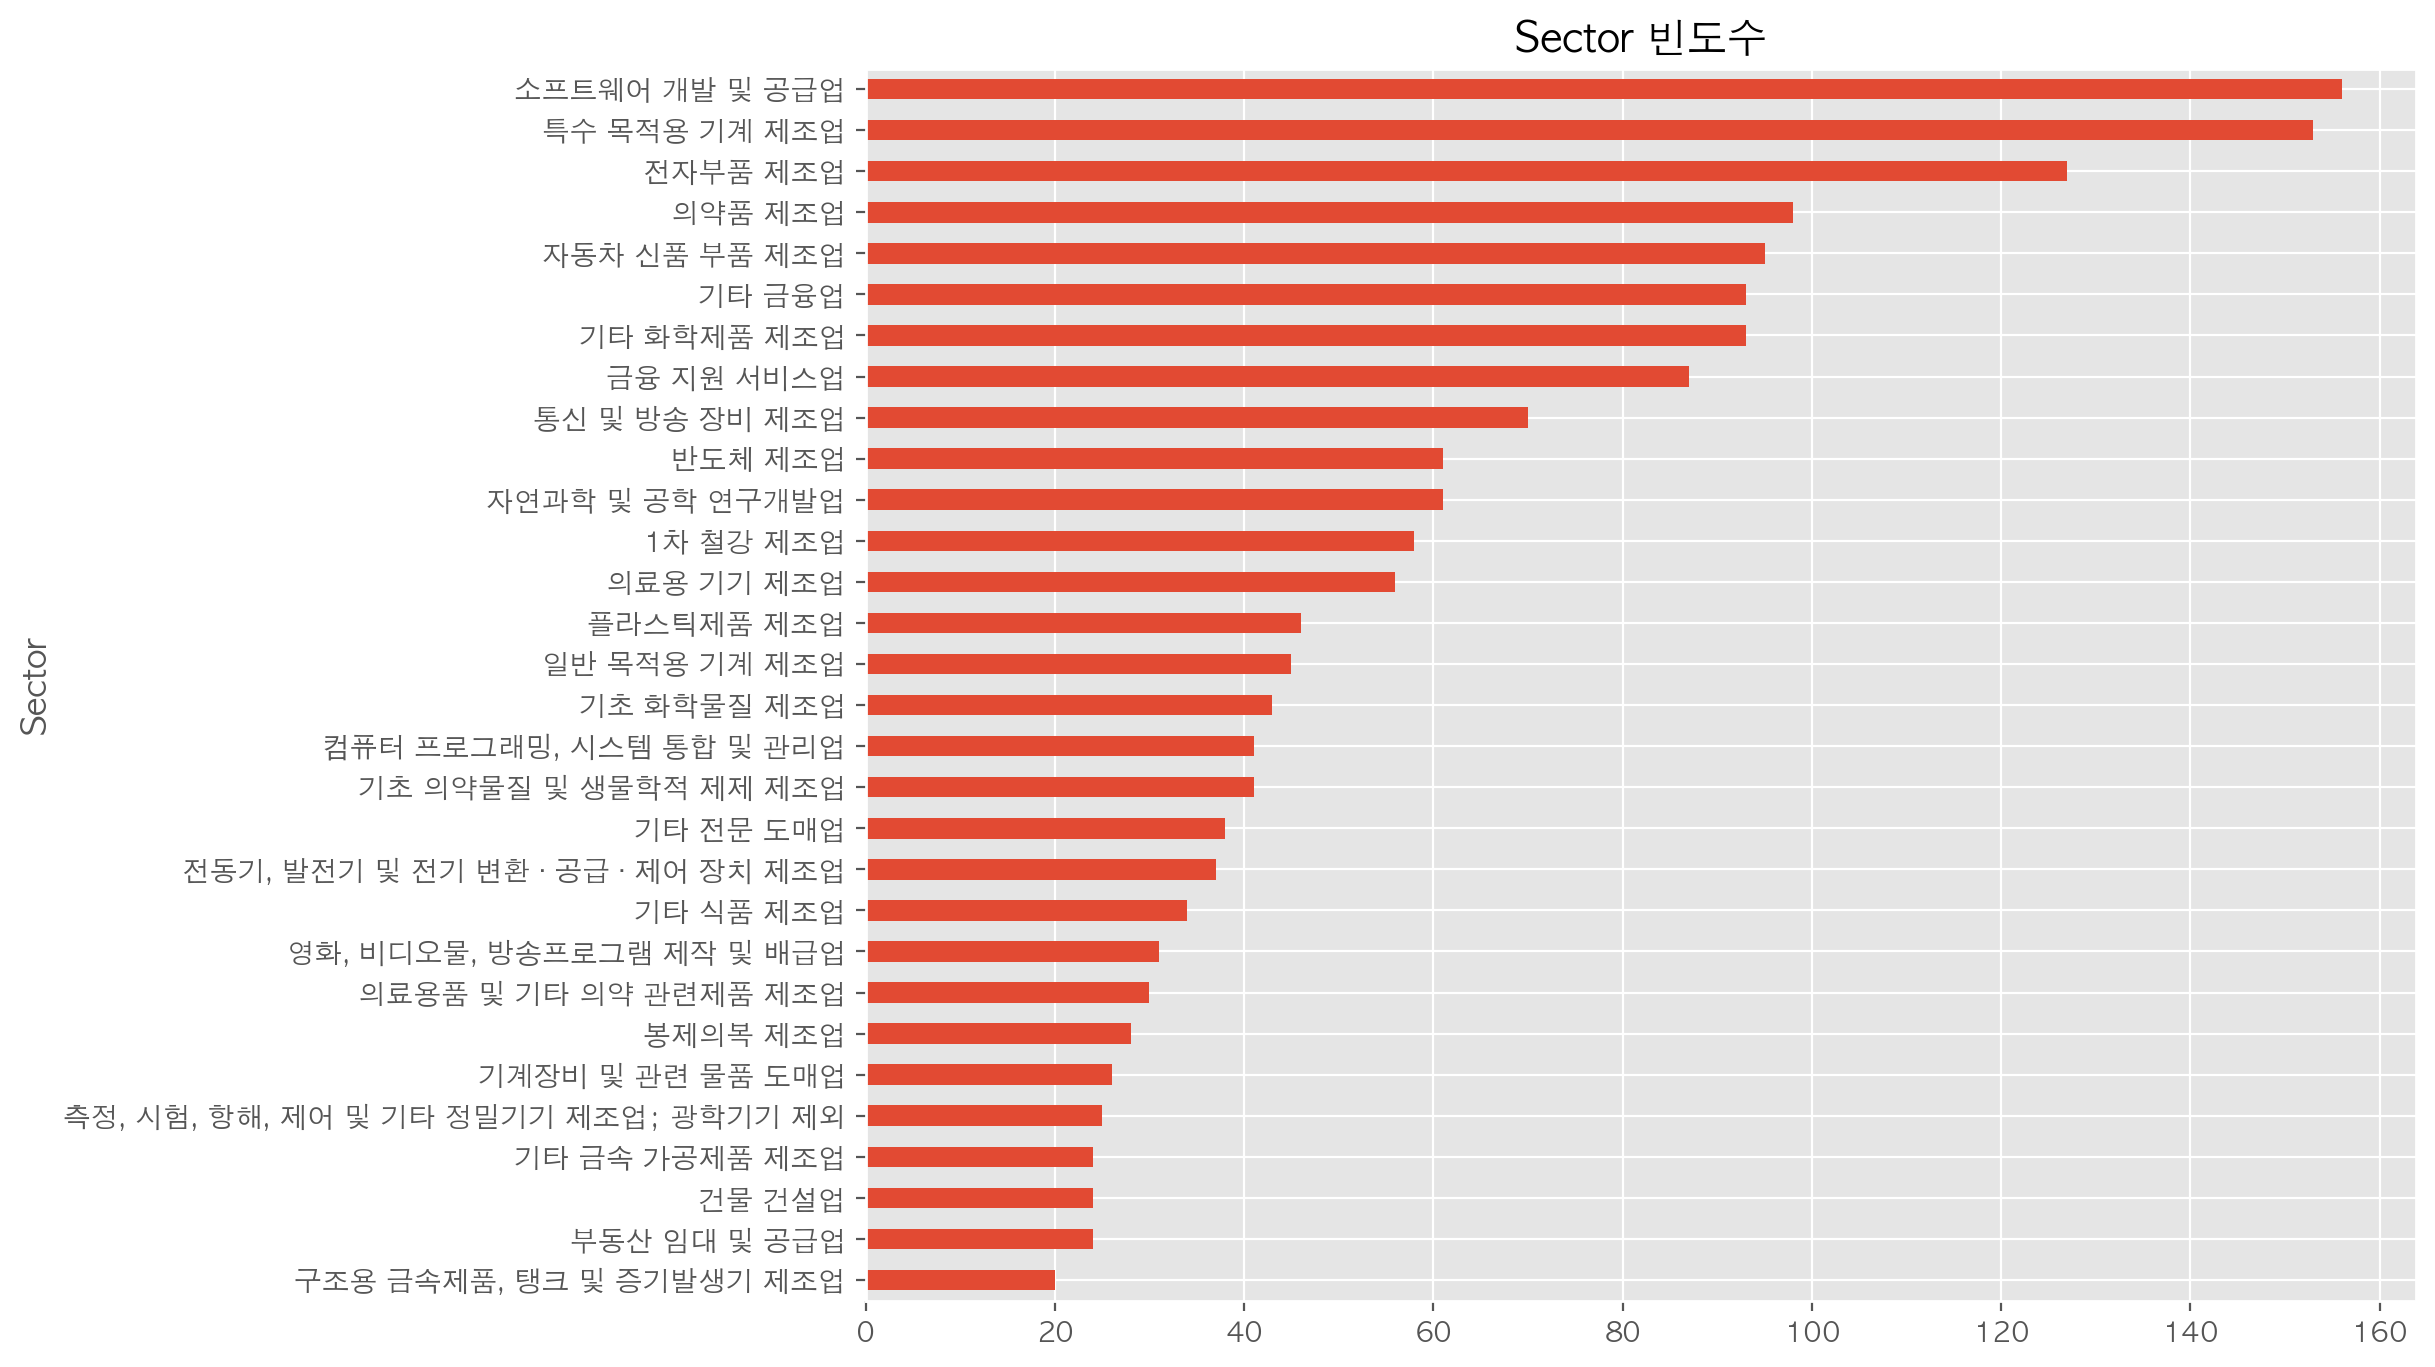

In [101]:
sector_count_top.sort_values().plot.barh(figsize=(10, 8), title="Sector 빈도수")

In [89]:
df["Sector"].isin(sector_count_top.index)
sector_count_top.index

Index(['소프트웨어 개발 및 공급업', '특수 목적용 기계 제조업', '전자부품 제조업', '의약품 제조업',
       '자동차 신품 부품 제조업', '기타 금융업', '기타 화학제품 제조업', '금융 지원 서비스업',
       '통신 및 방송 장비 제조업', '반도체 제조업', '자연과학 및 공학 연구개발업', '1차 철강 제조업',
       '의료용 기기 제조업', '플라스틱제품 제조업', '일반 목적용 기계 제조업', '기초 화학물질 제조업',
       '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '기초 의약물질 및 생물학적 제제 제조업', '기타 전문 도매업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '기타 식품 제조업',
       '영화, 비디오물, 방송프로그램 제작 및 배급업', '의료용품 및 기타 의약 관련제품 제조업', '봉제의복 제조업',
       '기계장비 및 관련 물품 도매업', '측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외', '건물 건설업',
       '부동산 임대 및 공급업', '기타 금속 가공제품 제조업', '구조용 금속제품, 탱크 및 증기발생기 제조업'],
      dtype='object', name='Sector')

In [90]:
df["Sector"].isin(sector_count_top.index)

0        True
1       False
2        True
3        True
4        True
        ...  
7869    False
7870    False
7871    False
7872    False
7873     True
Name: Sector, Length: 7874, dtype: bool

In [91]:
df[df["Sector"].isin(sector_count_top.index)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
7857,084110,KOSDAQ,휴온스글로벌,의약품 제조업,의약품제조업,2006-12-19,12월,송수영,http://www.huonsglobal.com,경기도,2006.0
7858,145020,KOSDAQ,휴젤,기초 의약물질 및 생물학적 제제 제조업,"보툴리눔톡신, 필러",2015-12-24,12월,손지훈,http://www.hugel.co.kr,강원도,2015.0
7859,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시,1994.0
7860,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_2314/1042873588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)],


<Axes: xlabel='count', ylabel='Sector'>

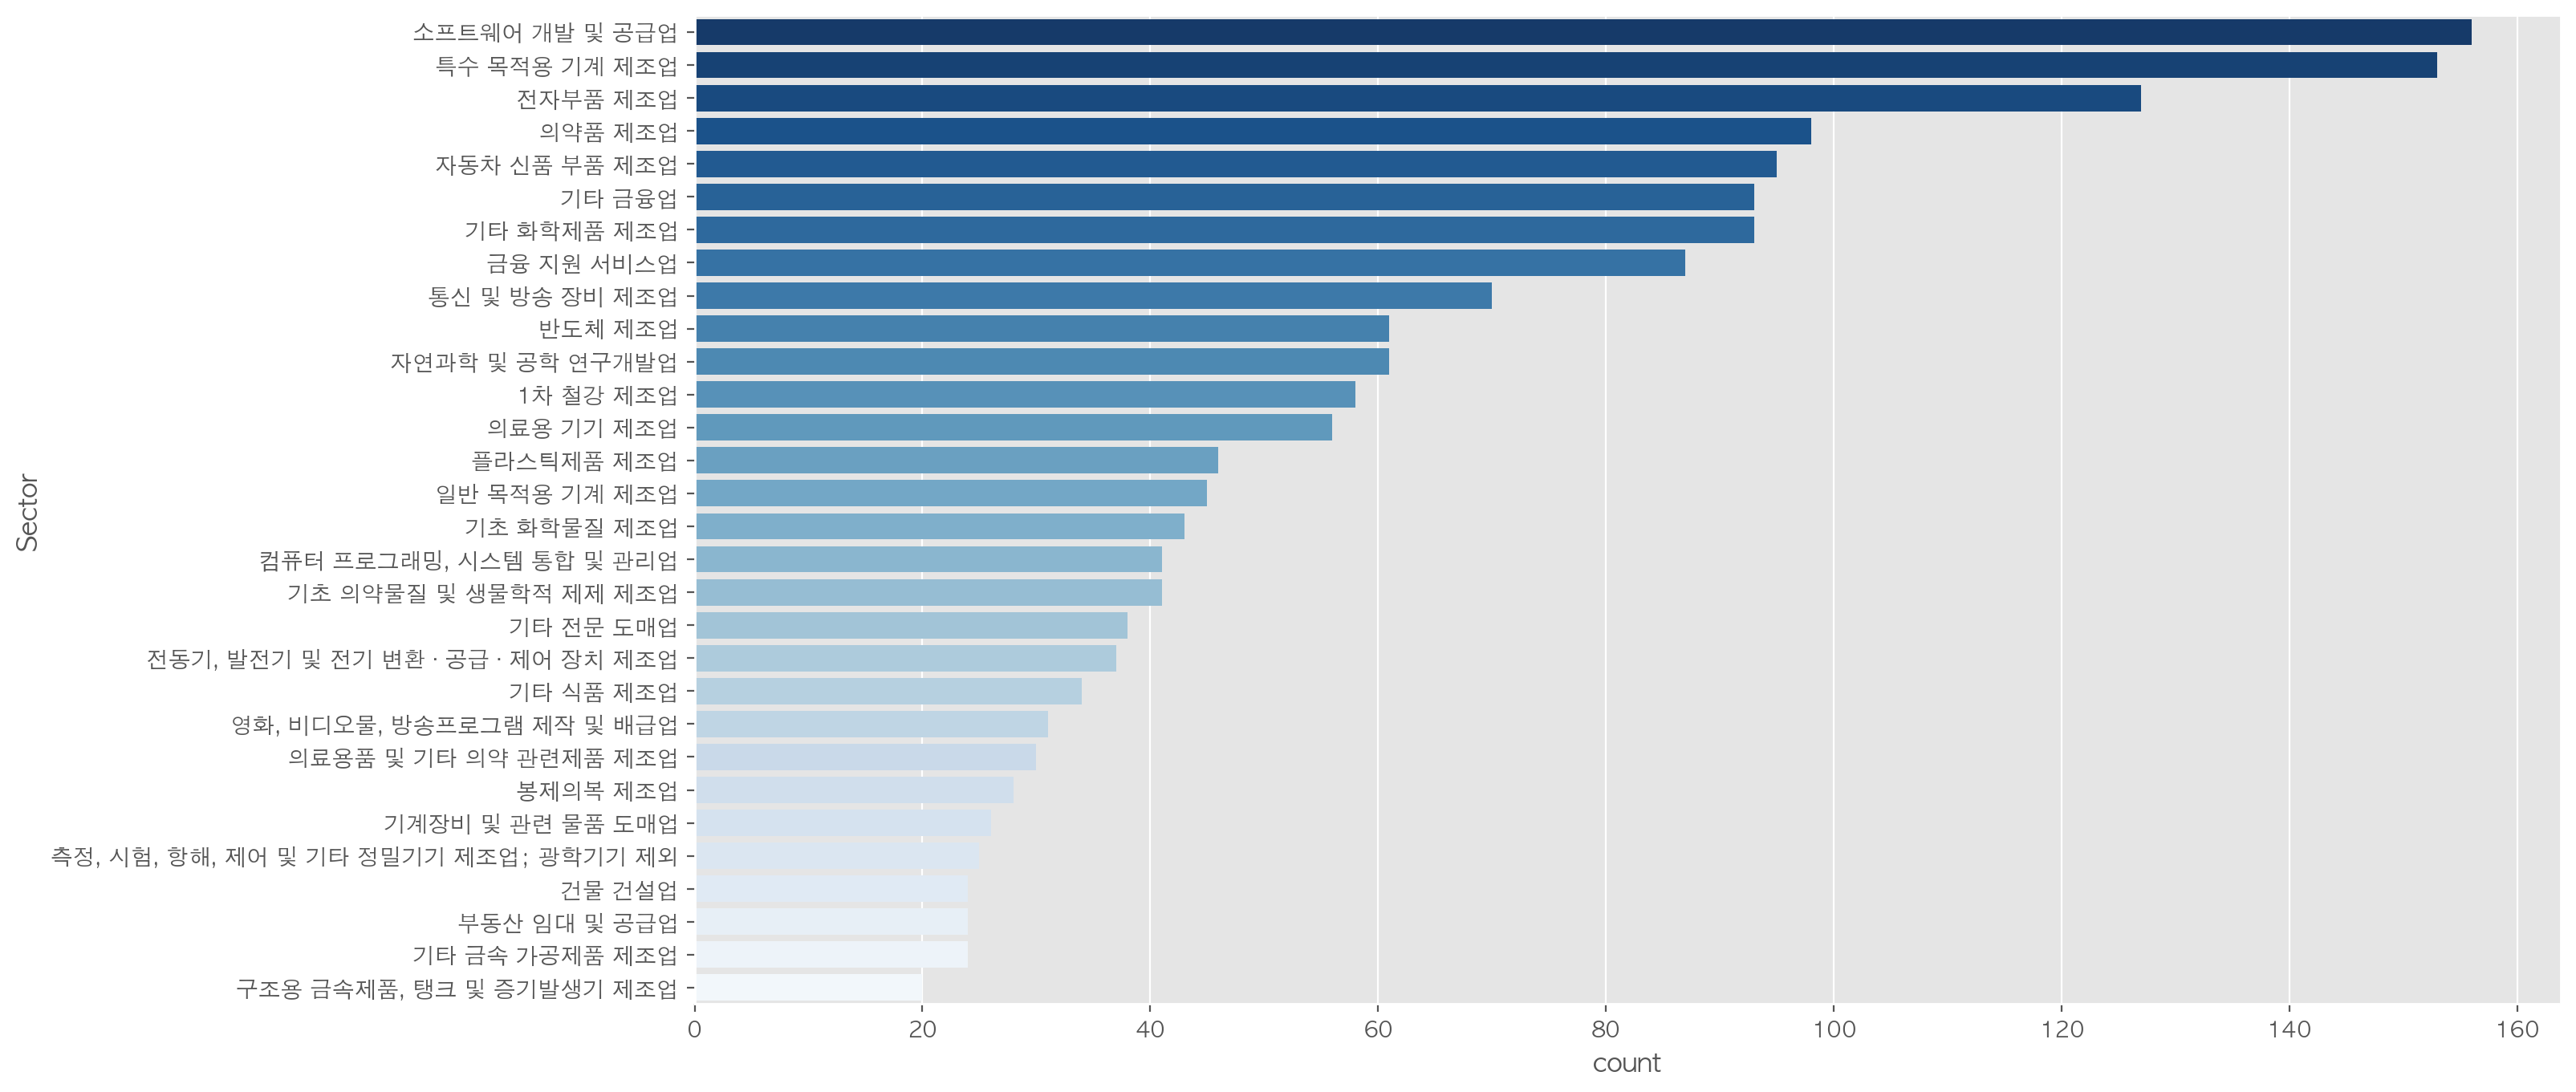

In [92]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
plt.figure(figsize=(15, 8))
sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)],
              y="Sector", palette="Blues_r",
              order=sector_count_top.index)

In [93]:
# 빈도수가 가장 많은 데이터 색인하기
df[df["Sector"] == "소프트웨어 개발 및 공급업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
120,214270,KOSDAQ,FSN,소프트웨어 개발 및 공급업,카울리,2015-03-25,12월,"이상석, 서정교 (각자 대표이사)",http://fsn.co.kr,서울특별시,2015.0
1279,046440,KOSDAQ,KG모빌리언스,소프트웨어 개발 및 공급업,유무선전화결제서비스,2004-12-14,12월,고규영,http://www.mobilians.co.kr,서울특별시,2004.0
1281,035600,KOSDAQ,KG이니시스,소프트웨어 개발 및 공급업,전자지불서비스,2002-11-22,12월,유승용,http://www.inicis.com,서울특별시,2002.0
1563,086960,KOSDAQ,MDS테크,소프트웨어 개발 및 공급업,"임베디드개발솔루션,임베디드소프트웨어",2006-09-26,12월,"이창열, 이정승",http://www.mdstech.co.kr,경기도,2006.0
1575,181710,KOSPI,NHN,소프트웨어 개발 및 공급업,한게임,2013-08-29,12월,정우진,http://www.nhn.com,경기도,2013.0
...,...,...,...,...,...,...,...,...,...,...,...
7732,054920,KOSDAQ,한컴위드,소프트웨어 개발 및 공급업,전자상거래 보안 솔루션,2001-11-01,12월,"김현수, 송상엽(각자대표)",http://www.hsecure.co.kr,경기도,2001.0
7760,220180,KOSDAQ,핸디소프트,소프트웨어 개발 및 공급업,"EKP, BPM, 네트워크장비",2016-11-24,12월,이준희,http://www.handysoft.co.kr,경기도,2016.0
7788,307950,KOSPI,현대오토에버,소프트웨어 개발 및 공급업,"전산실운영, 시스템구축, 전산장비 납품, SOC/건축 사업",2019-03-28,12월,서정식,http://www.hyundai-autoever.com,서울특별시,2019.0
7792,090850,KOSDAQ,현대이지웰,소프트웨어 개발 및 공급업,선택적복리후생서비스,2013-12-27,12월,장영순,http://www.hyundaiezwel.com,서울특별시,2013.0


### Industry

In [94]:
# Industry 의 빈도수를 구합니다.
df["Industry"].value_counts()

Industry
기업인수합병                            30
지주회사                              20
기업인수 및 합병                         10
지주사업                               9
화장품                                7
                                  ..
IT 인프라 통합관리 솔루션                    1
컨택센터솔루션,BcN솔루션,ASP서비스사업            1
펠리노-1 단백질 저해제, 오토택신 저해제            1
골프용 거리측정기                          1
OLED Mask 인장기, OLED Mask 검사기 등     1
Name: count, Length: 2351, dtype: int64

<Axes: ylabel='Industry'>

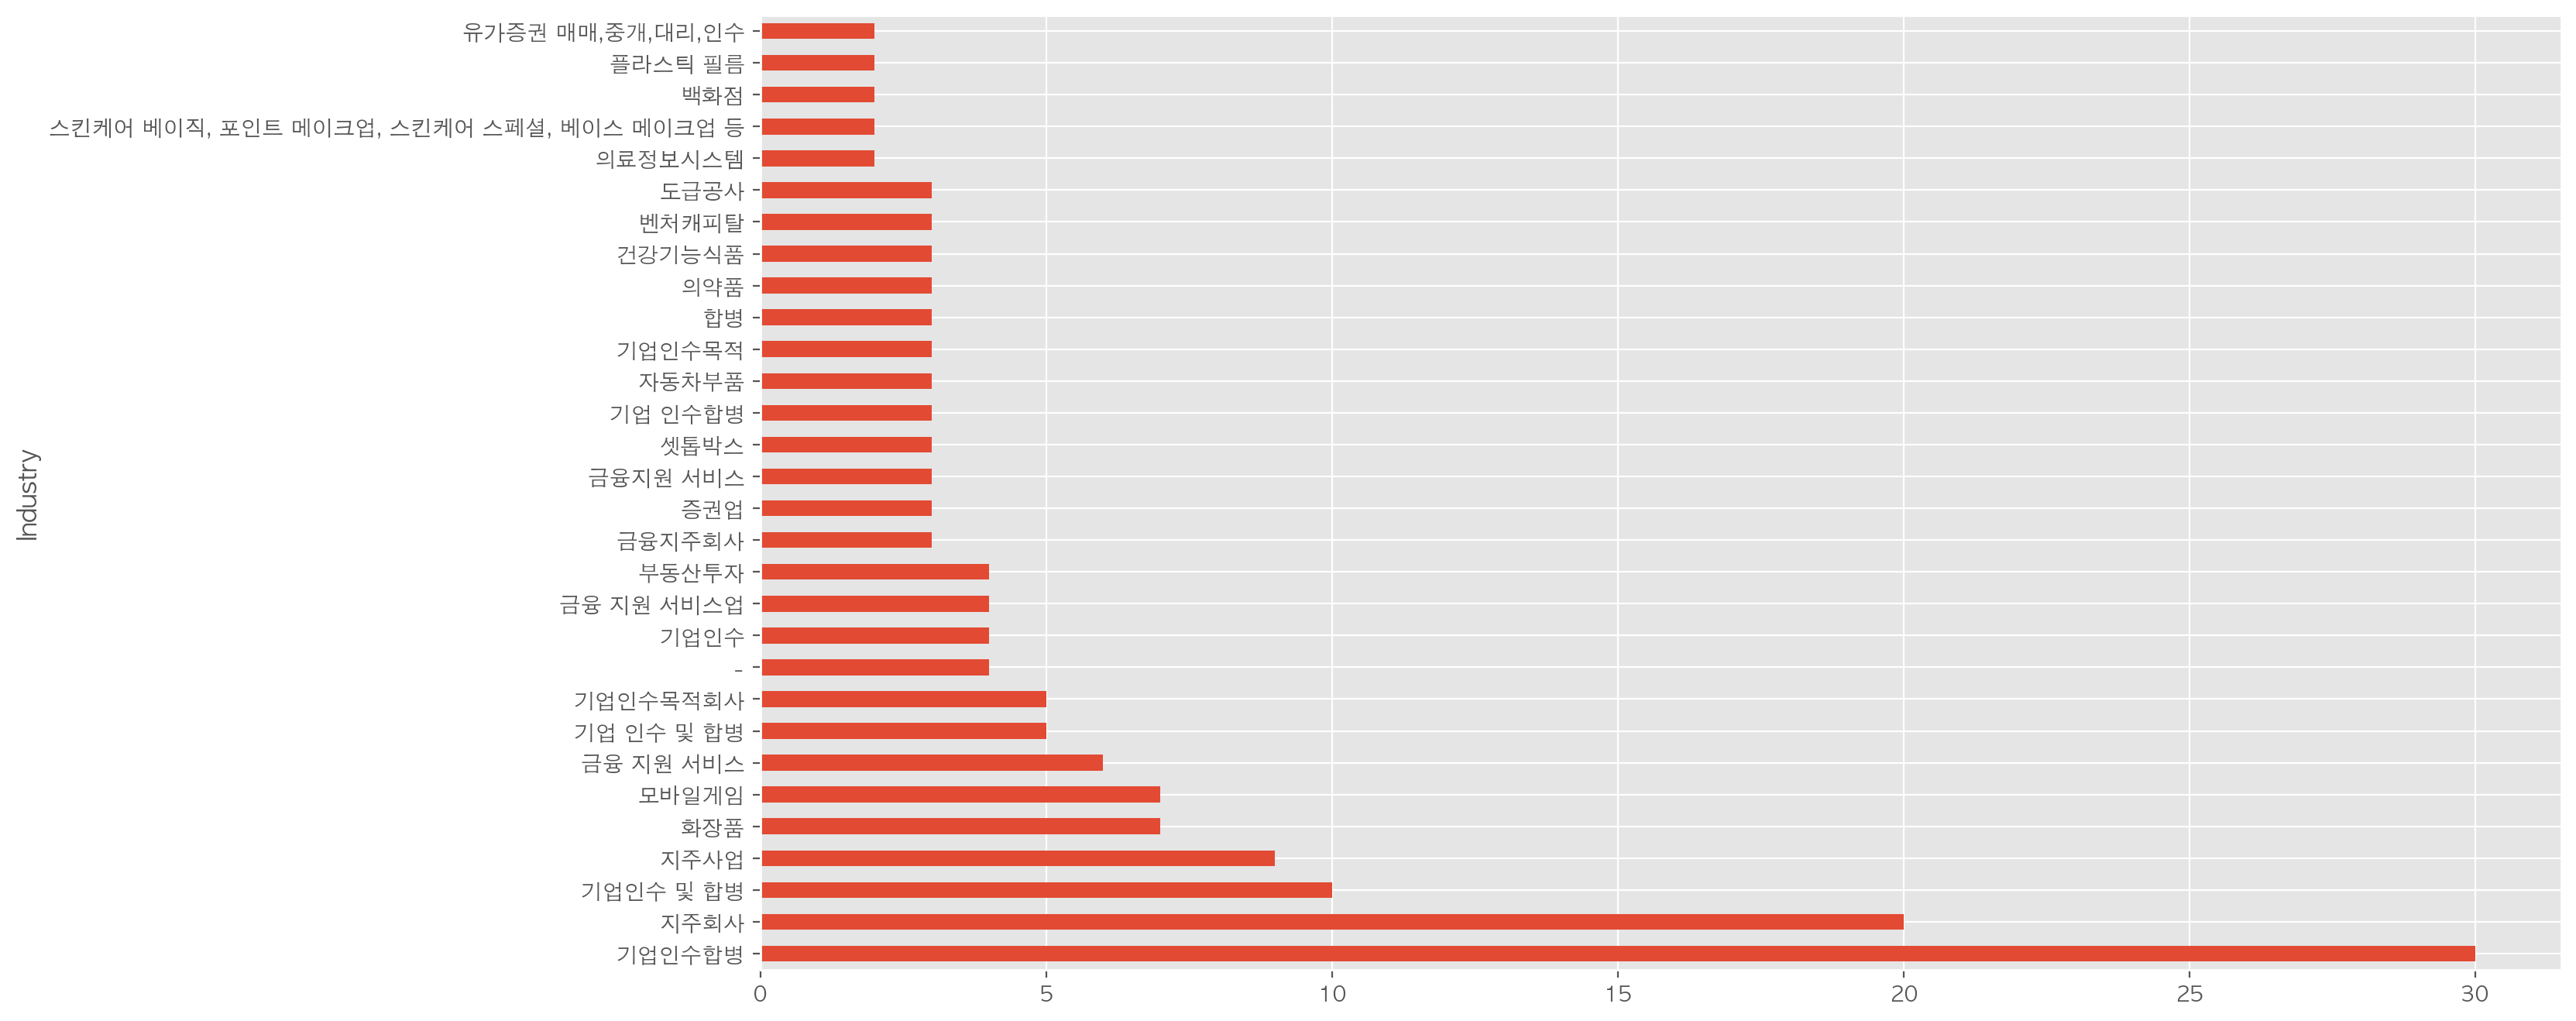

In [95]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.
plt.figure(figsize=(15, 8))
df["Industry"].value_counts().head(30).plot.barh()

<Axes: ylabel='Industry'>

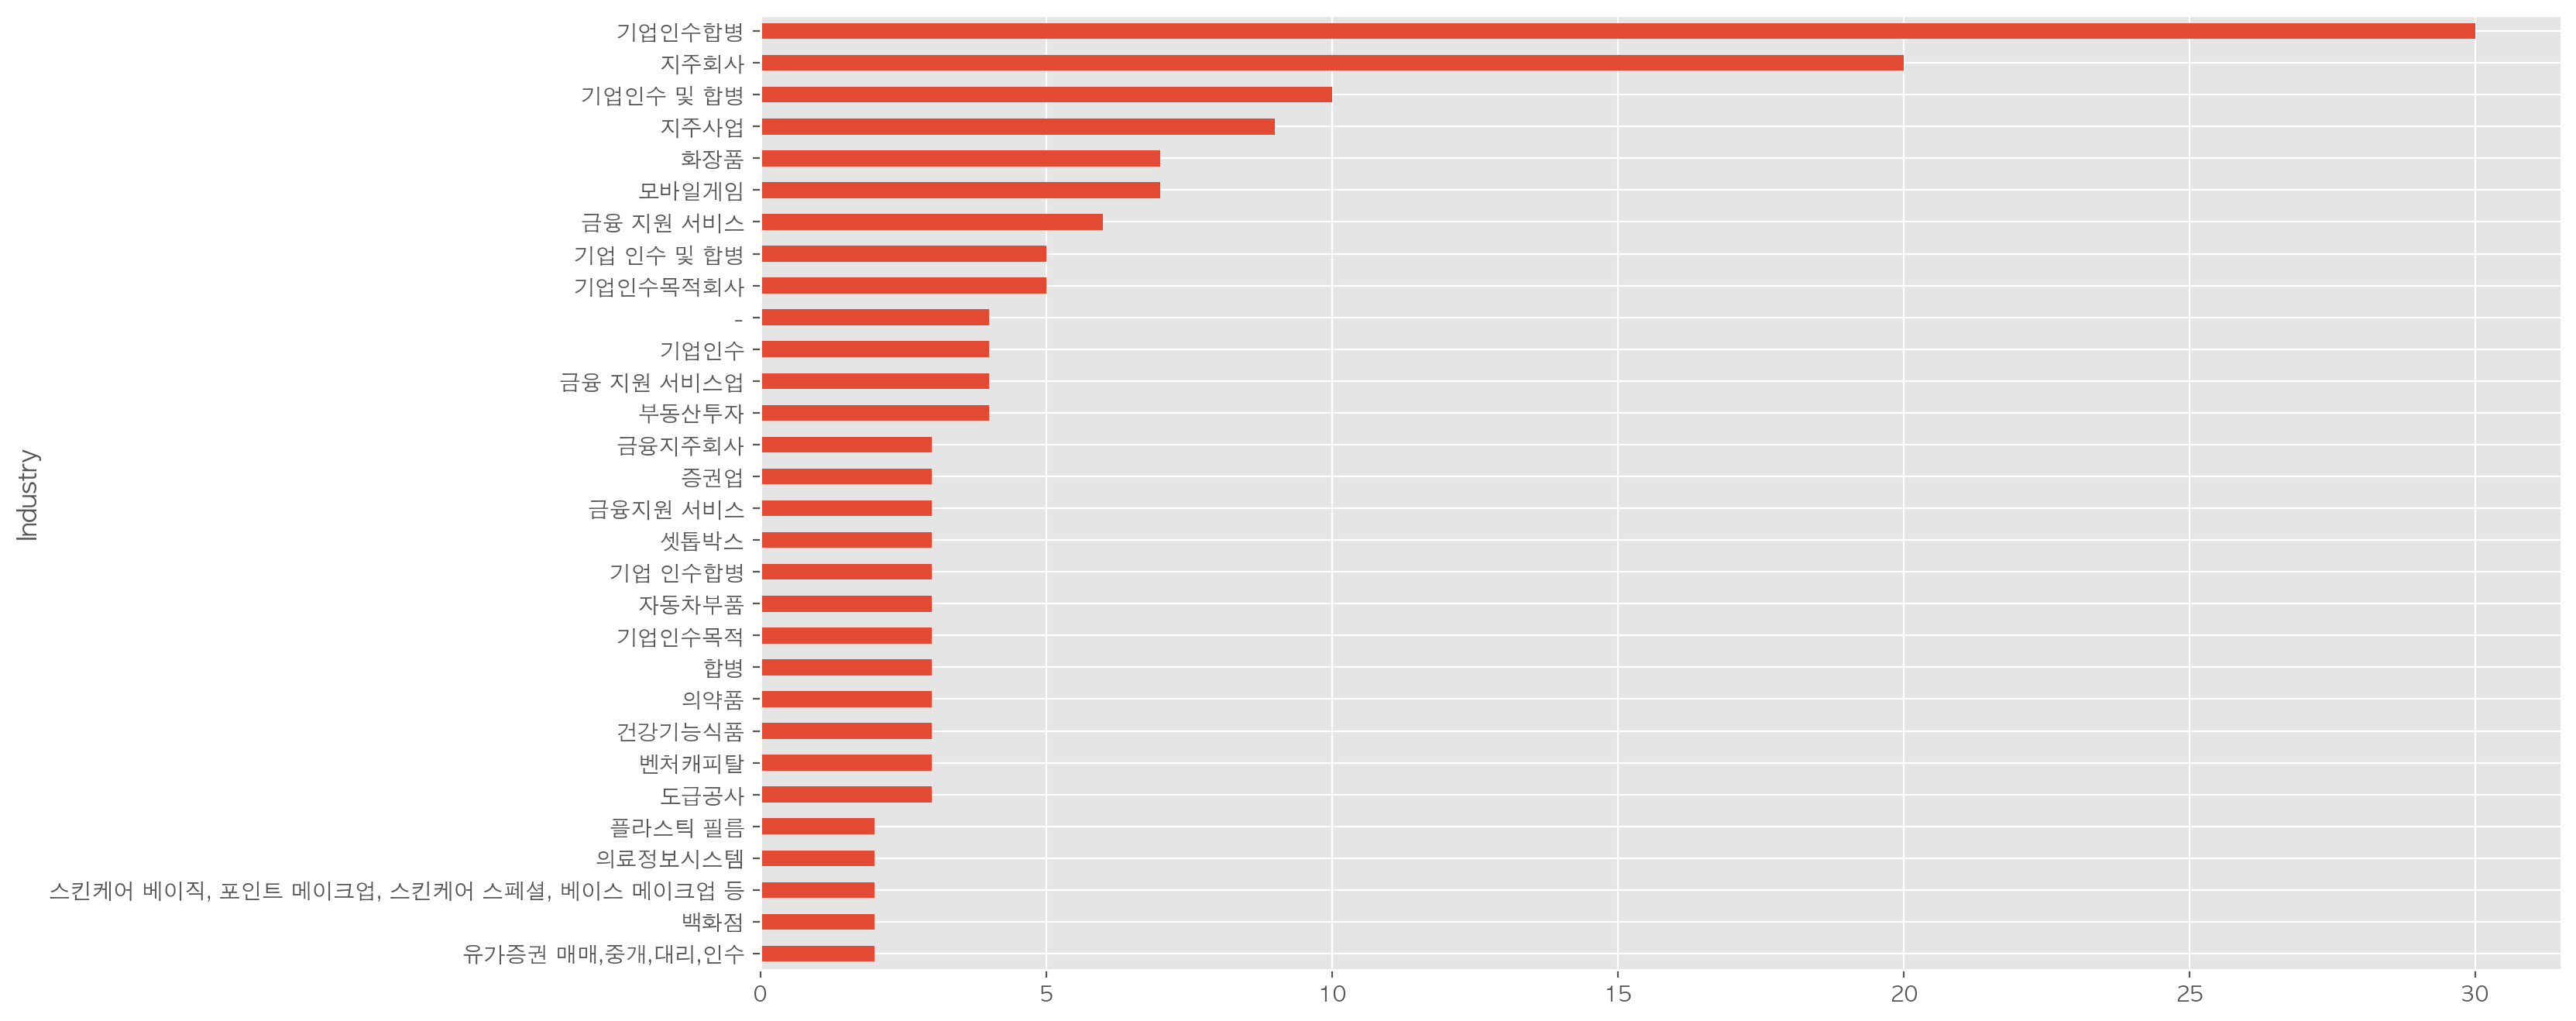

In [96]:
# sort_values 기능을 사용해 반대로 정렬해서 표시합니다.
plt.figure(figsize=(15, 8))
df["Industry"].value_counts().head(30).sort_values().plot.barh()

### Region 

<Axes: ylabel='Region'>

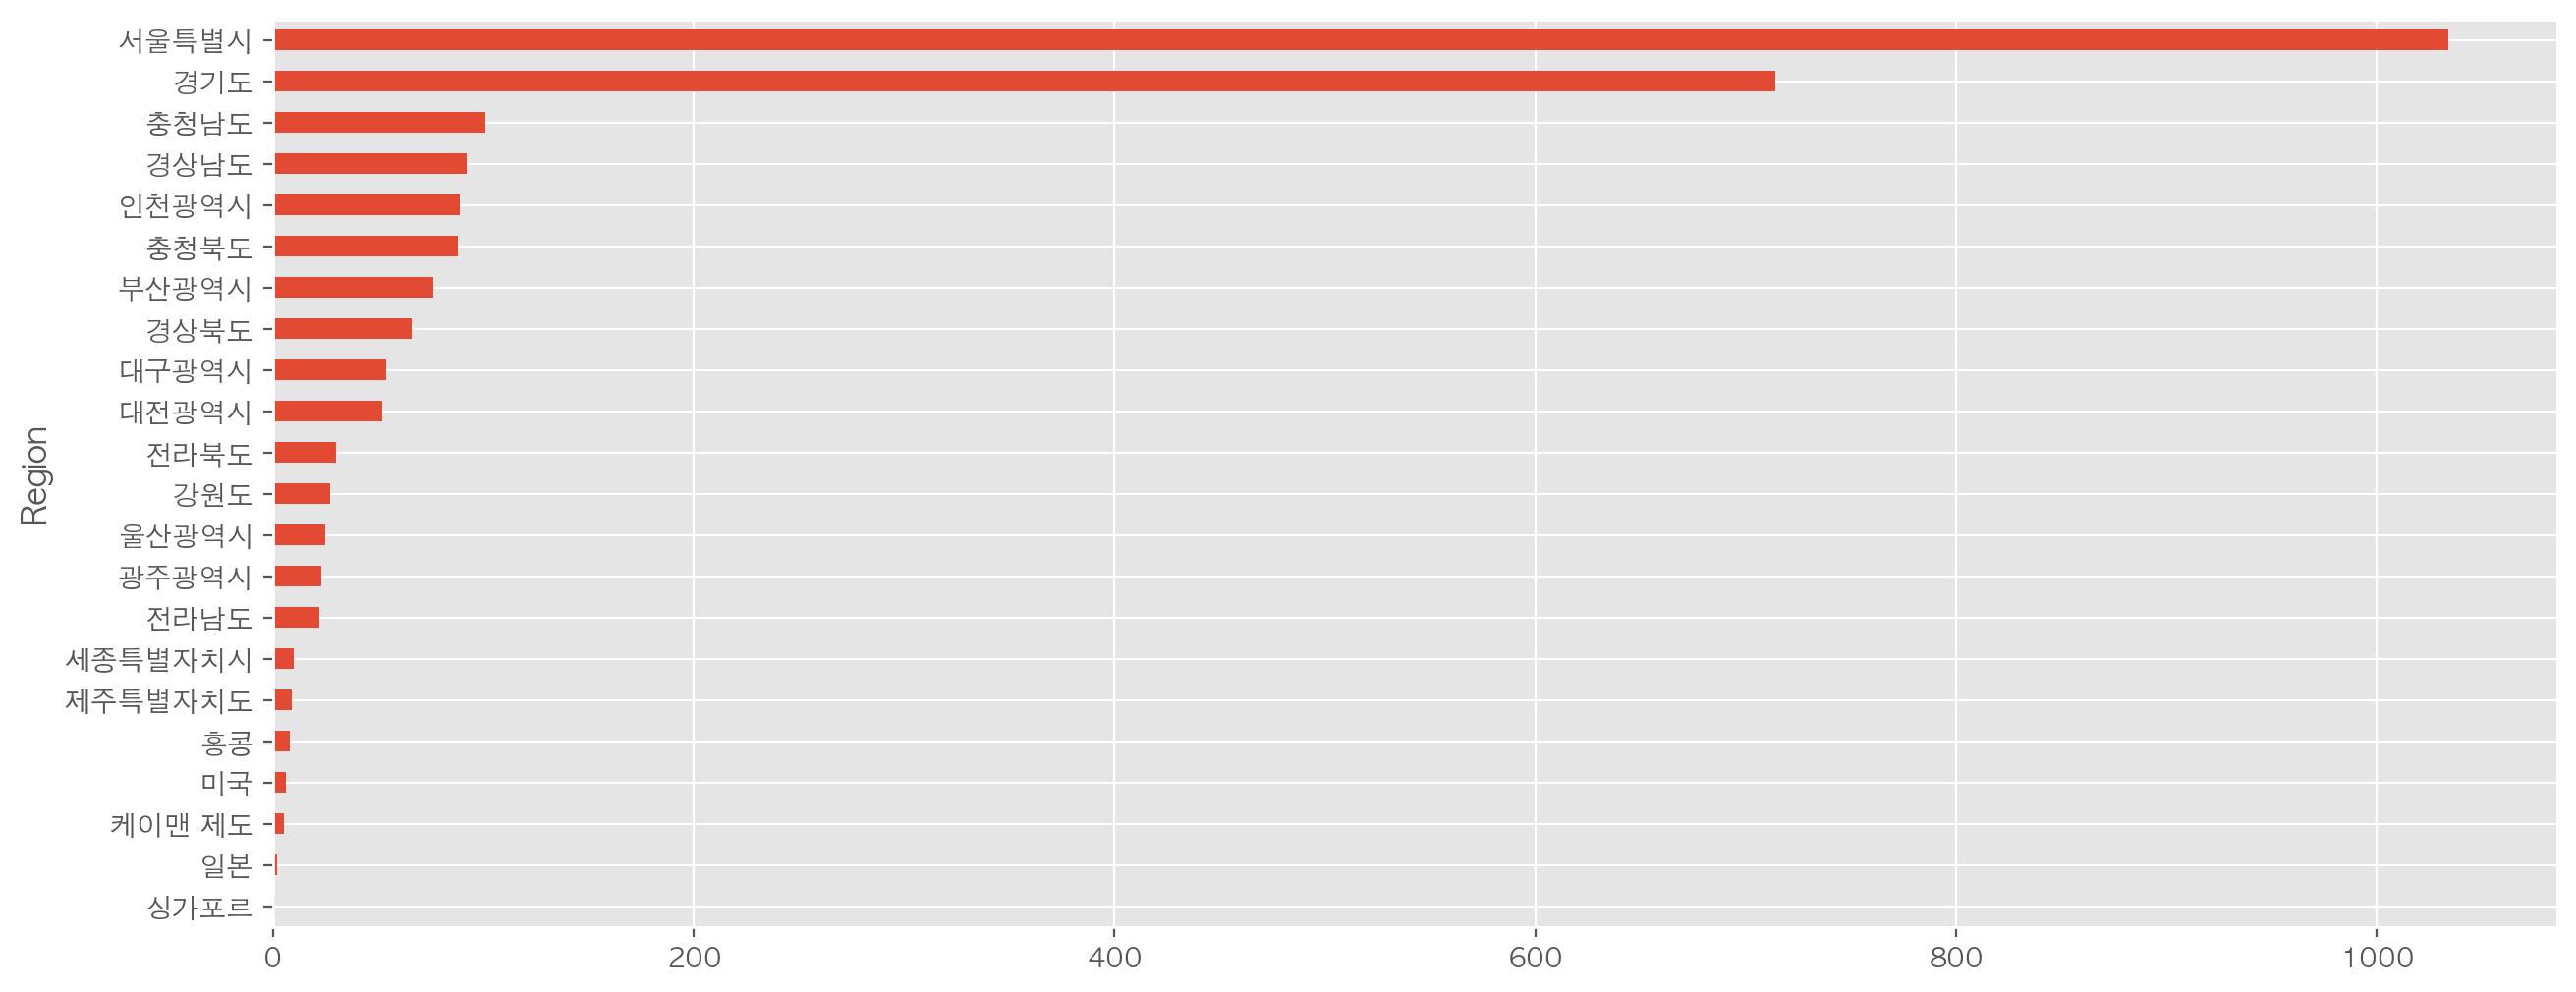

In [103]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.
plt.figure(figsize=(15, 6))
df["Region"].value_counts().sort_values().plot.barh()

In [108]:
df["Region"].value_counts().index

Index(['서울특별시', '경기도', '충청남도', '경상남도', '인천광역시', '충청북도', '부산광역시', '경상북도',
       '대구광역시', '대전광역시', '전라북도', '강원도', '울산광역시', '광주광역시', '전라남도', '세종특별자치시',
       '제주특별자치도', '홍콩', '미국', '케이맨 제도', '일본', '싱가포르'],
      dtype='object', name='Region')

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_2314/1627675514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Region",


Text(0.5, 1.0, '소재지별 종목 수')

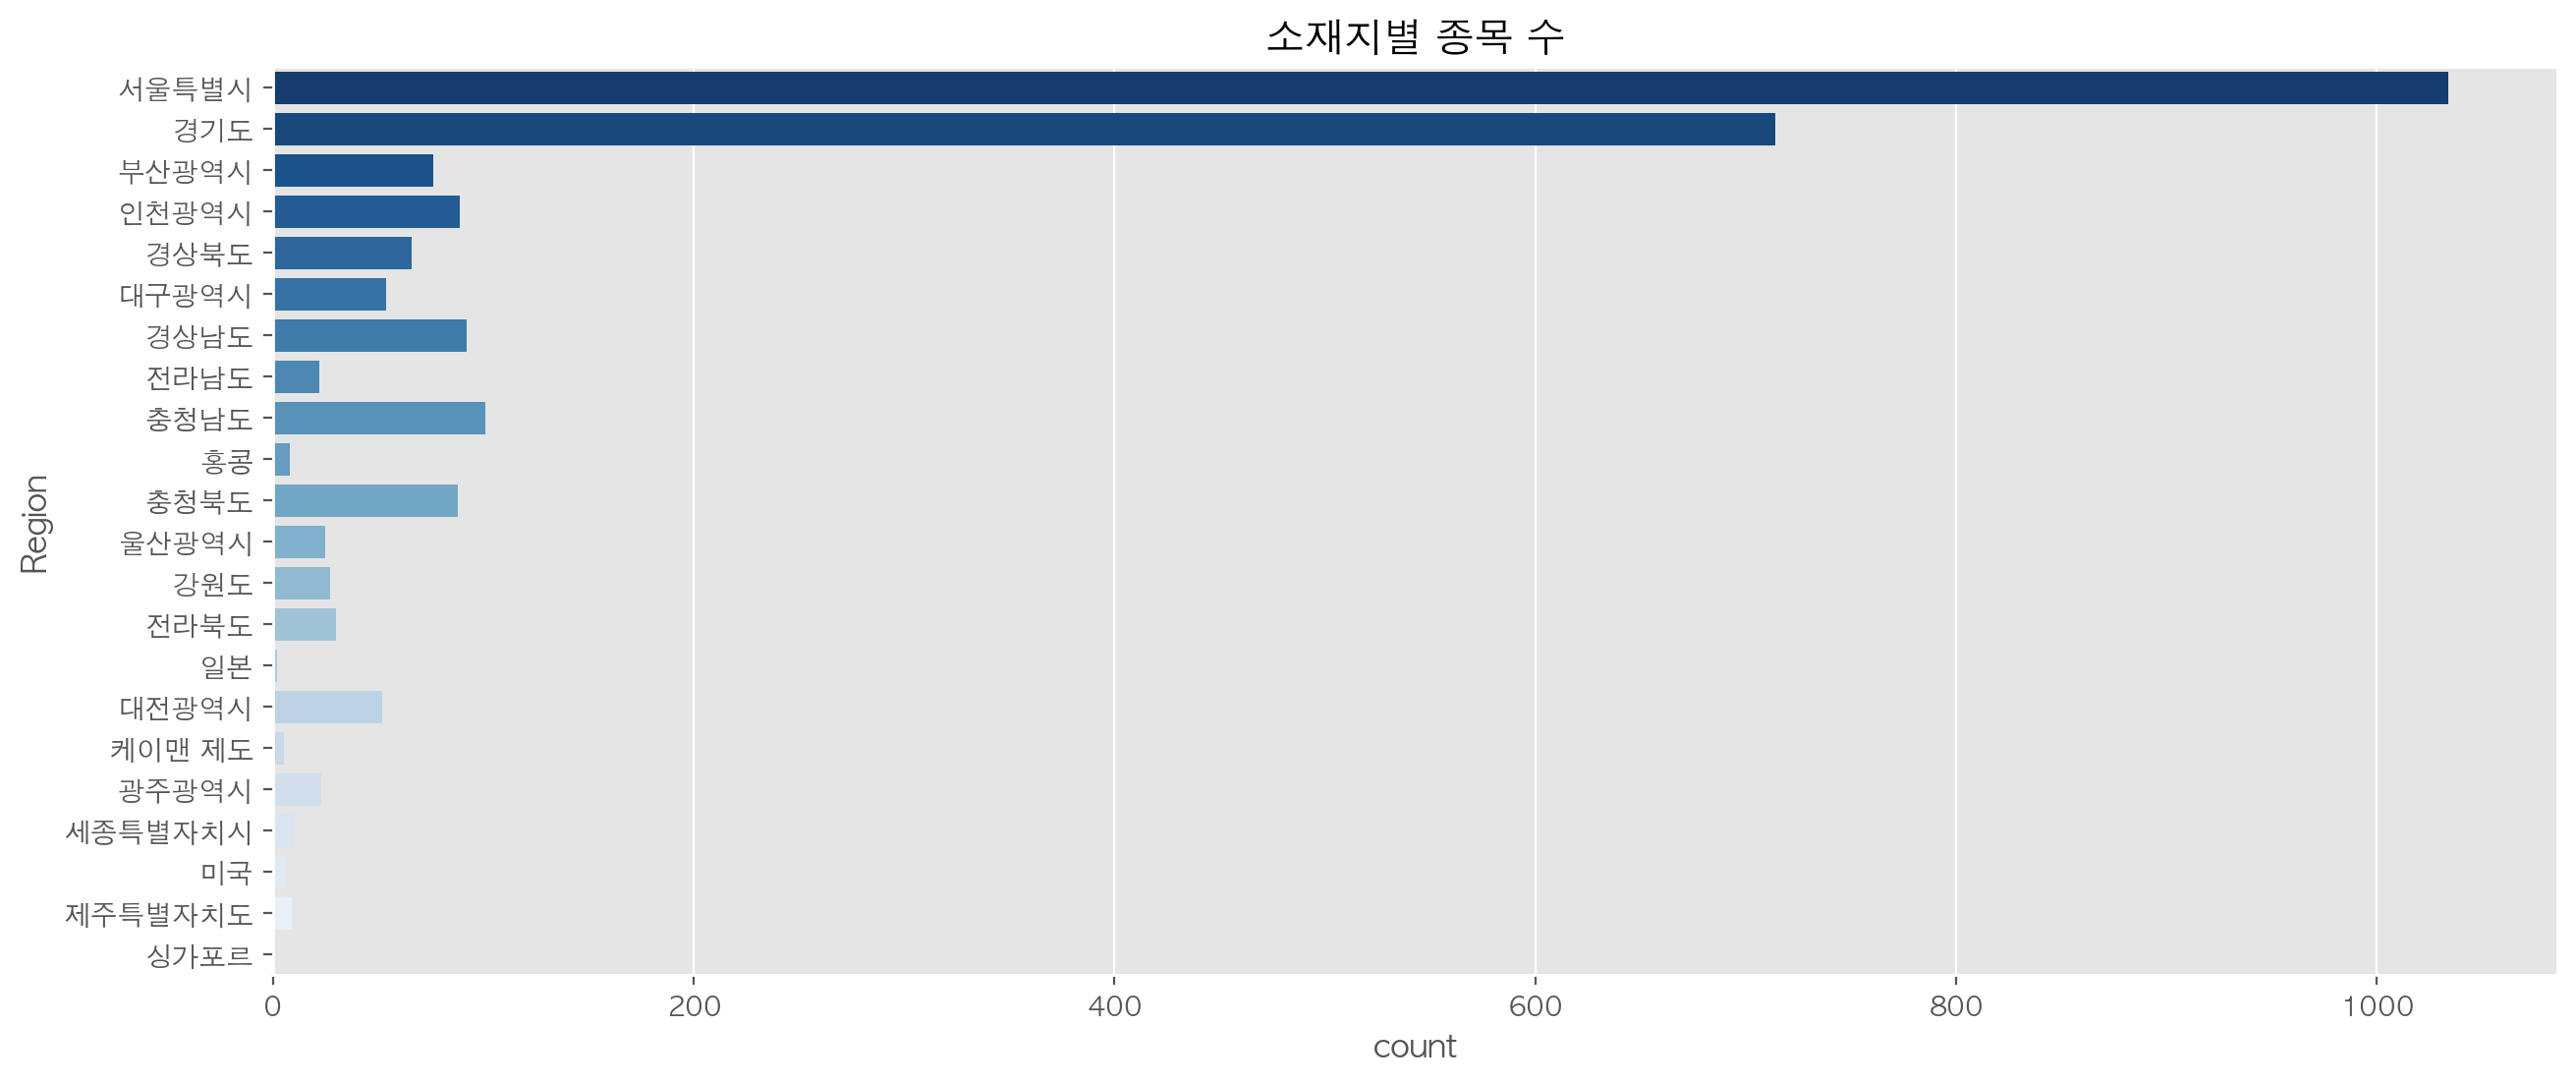

In [126]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.
plt.figure(figsize=(15, 6))
sns.countplot(data=df, y="Region", 
              palette="Blues_r").set_title("소재지별 종목 수")

In [124]:
df["Region"].value_counts().index

Index(['서울특별시', '경기도', '충청남도', '경상남도', '인천광역시', '충청북도', '부산광역시', '경상북도',
       '대구광역시', '대전광역시', '전라북도', '강원도', '울산광역시', '광주광역시', '전라남도', '세종특별자치시',
       '제주특별자치도', '홍콩', '미국', '케이맨 제도', '일본', '싱가포르'],
      dtype='object', name='Region')

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_2314/3805141397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Region",


Text(0.5, 1.0, '소재지별 종목 수')

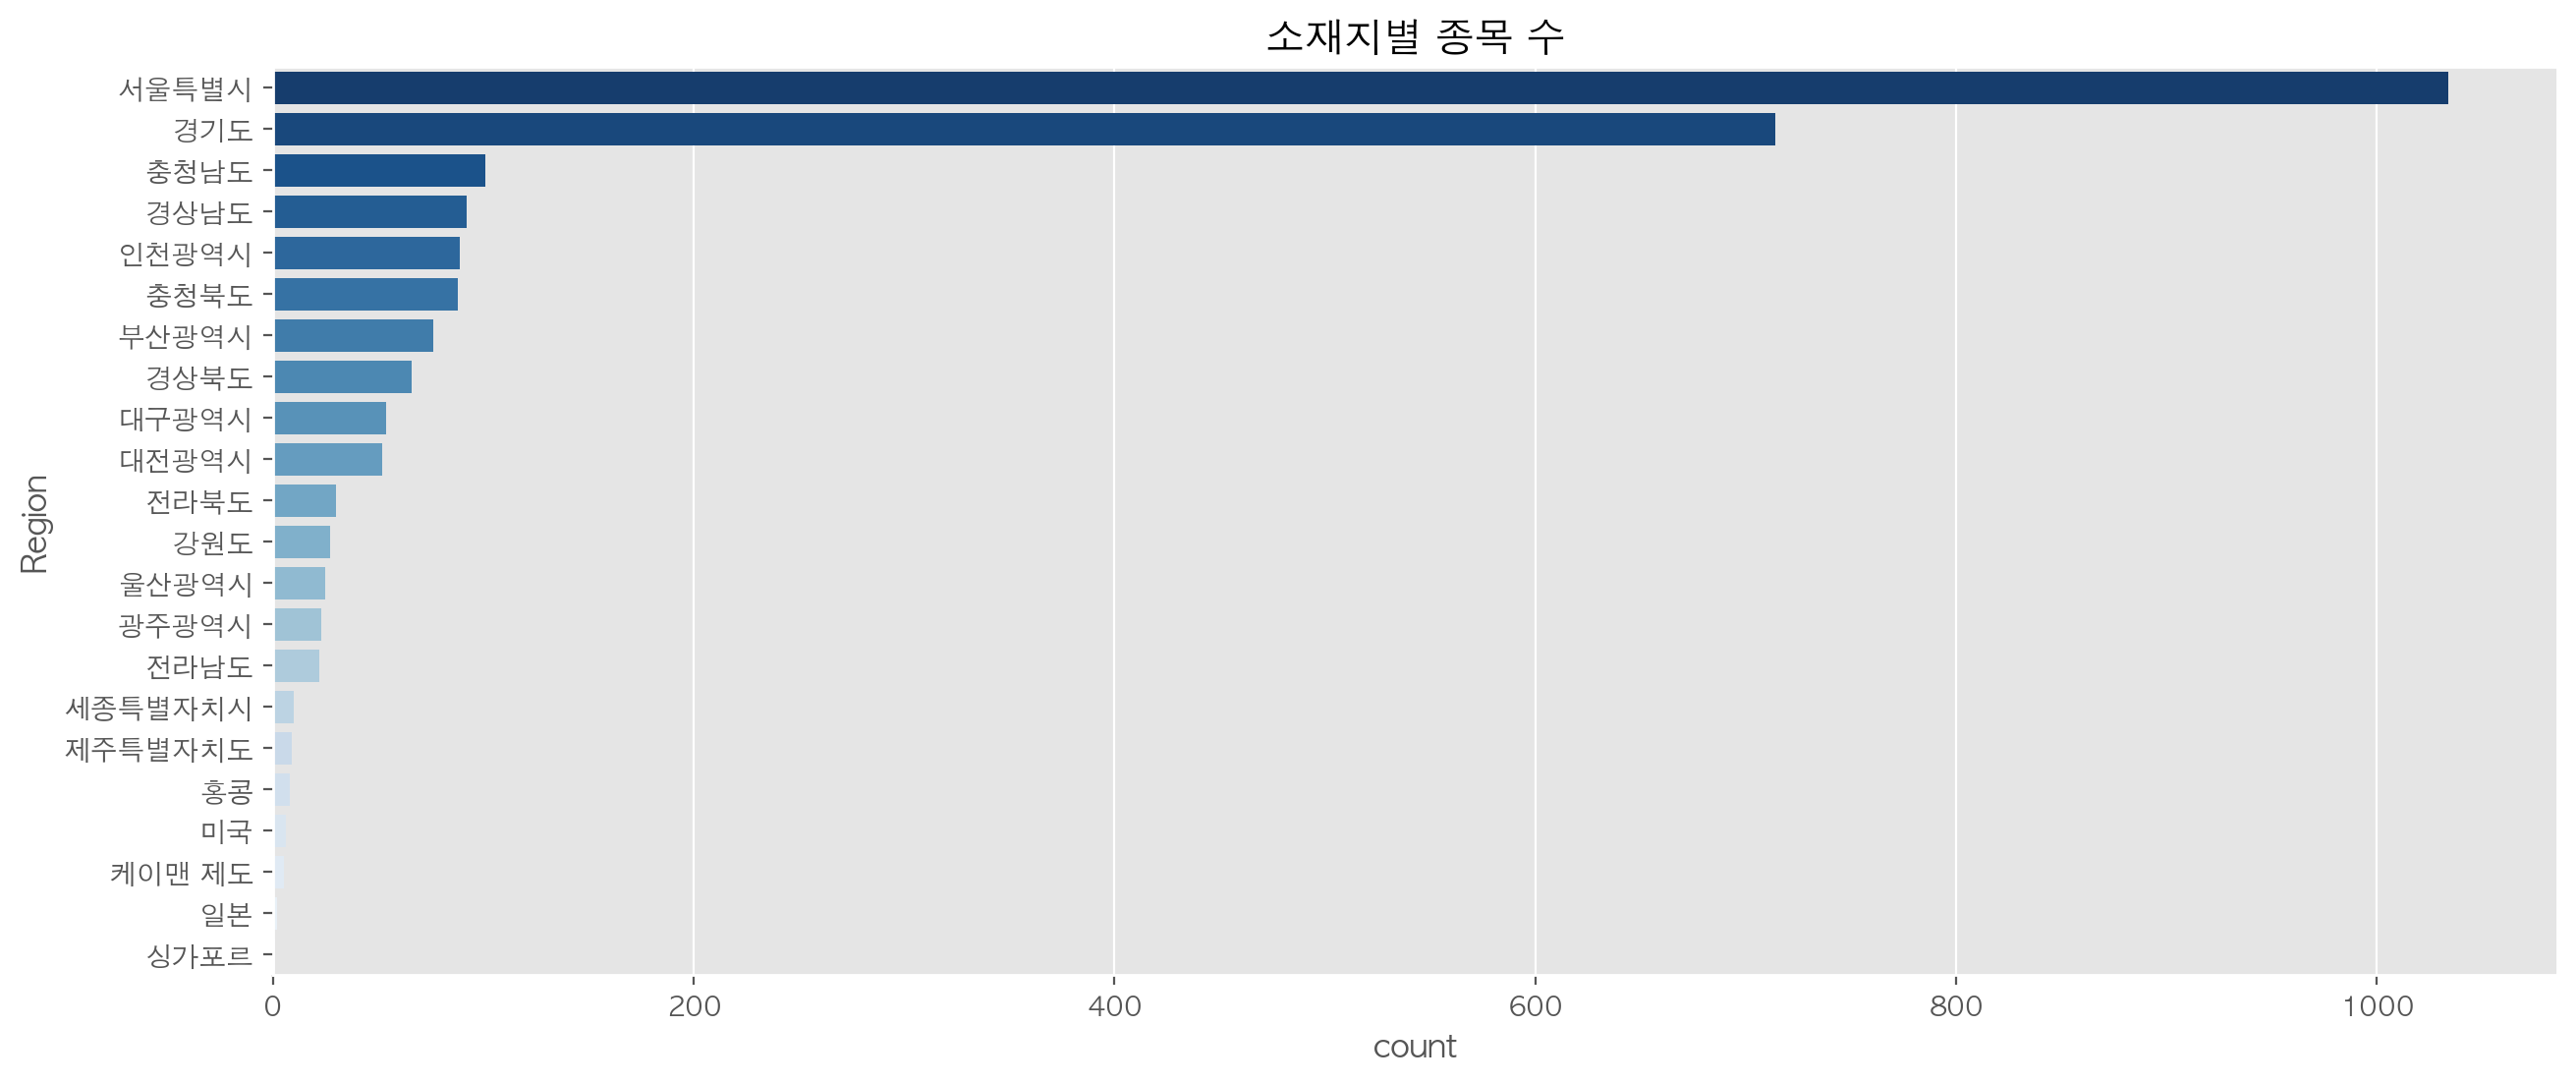

In [125]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.
plt.figure(figsize=(15, 6))
sns.countplot(data=df, y="Region", 
              palette="Blues_r",
              order=df["Region"].value_counts().index).set_title("소재지별 종목 수")

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_2314/797462245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df.sort_values(by="Region"),


<Axes: xlabel='count', ylabel='Region'>

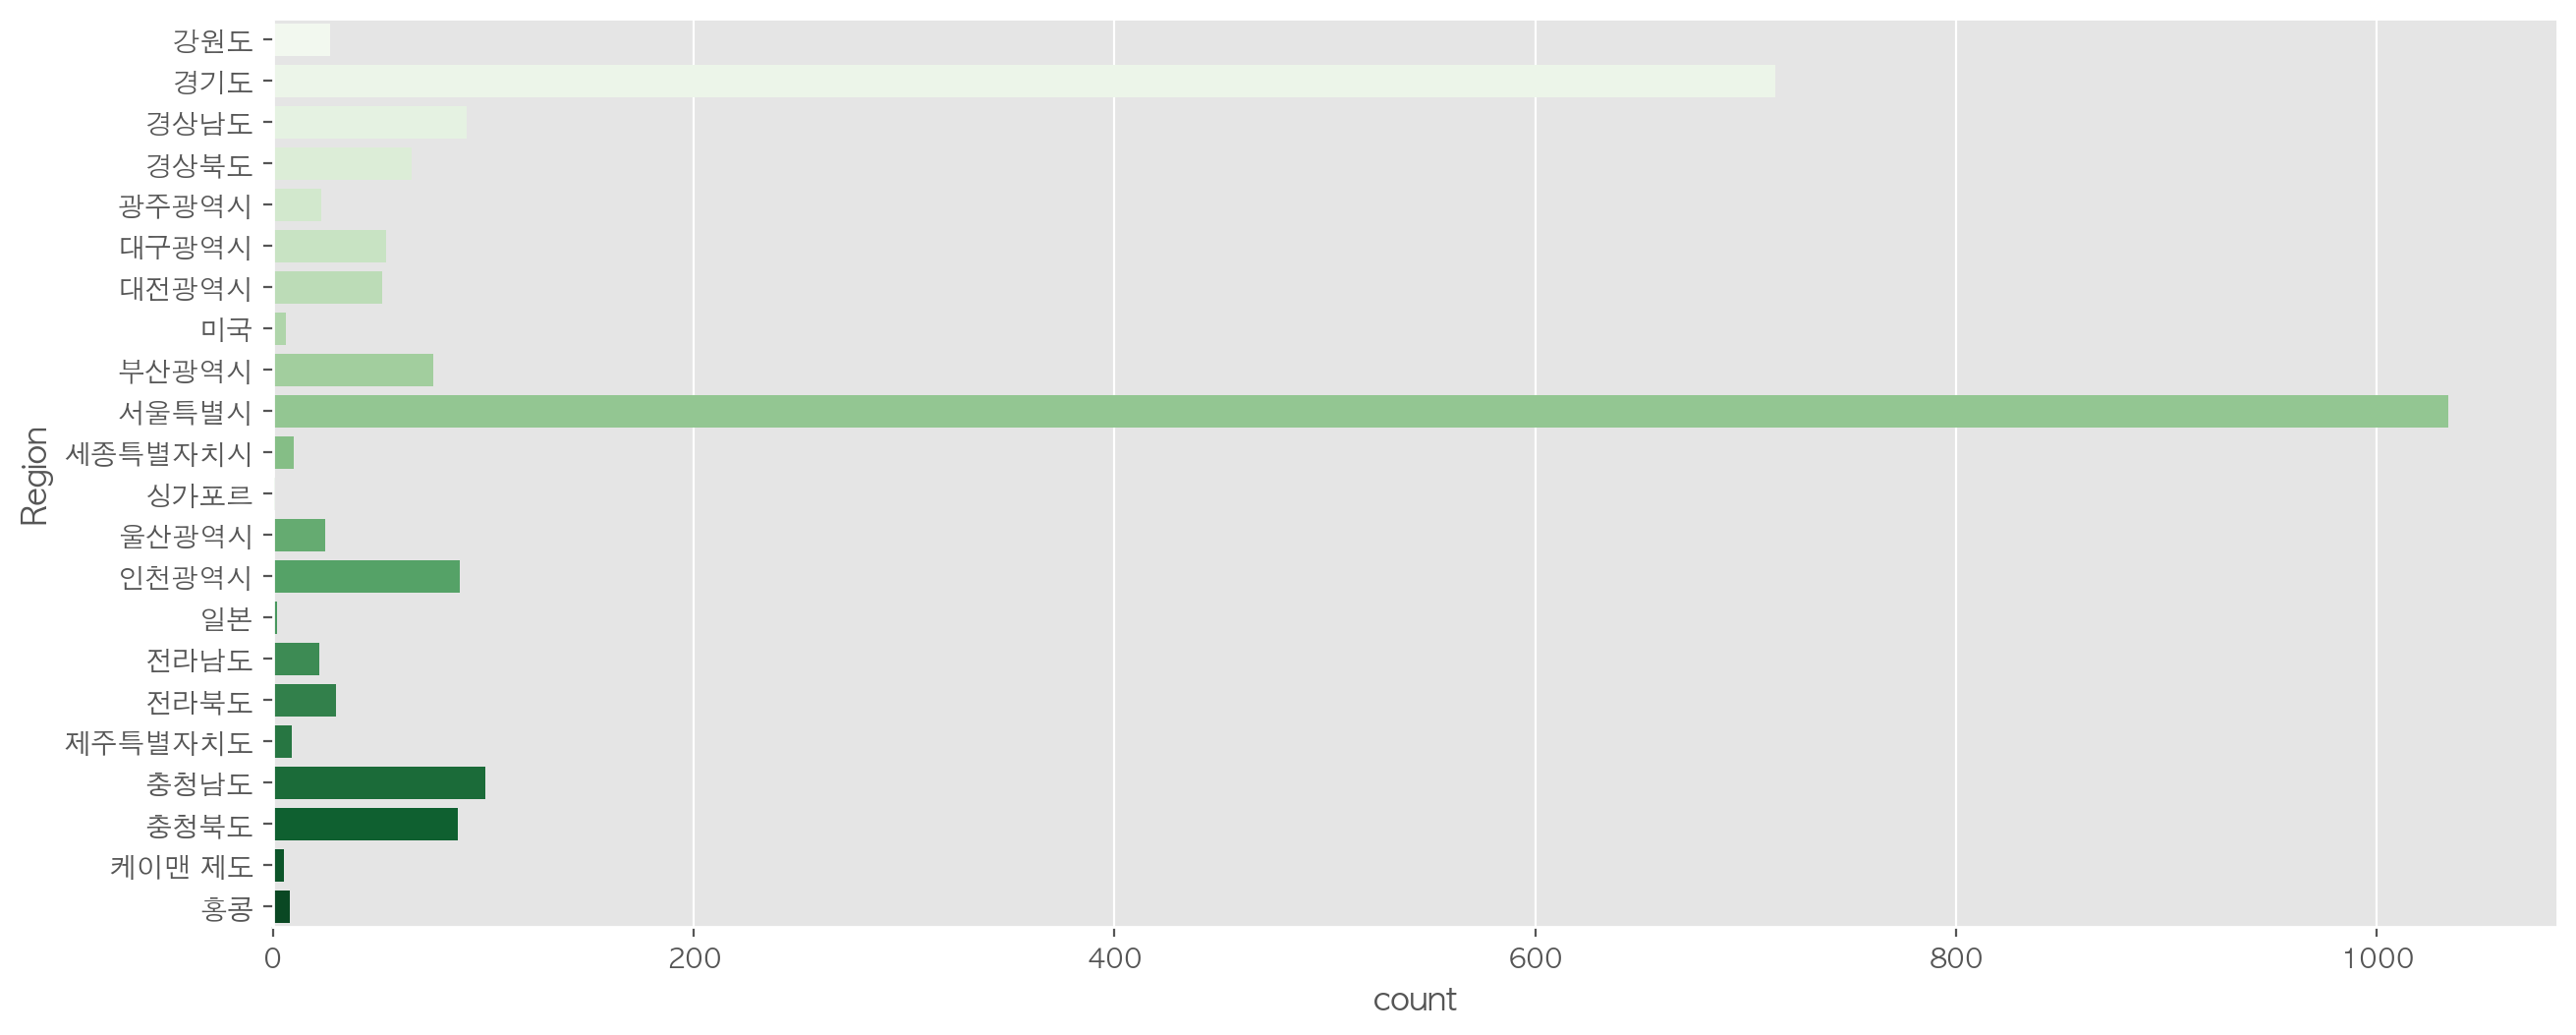

In [127]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df.sort_values(by="Region"), 
              palette="Greens",
              y="Region")

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_2314/797462245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df.sort_values(by="Region"),


<Axes: xlabel='count', ylabel='Region'>

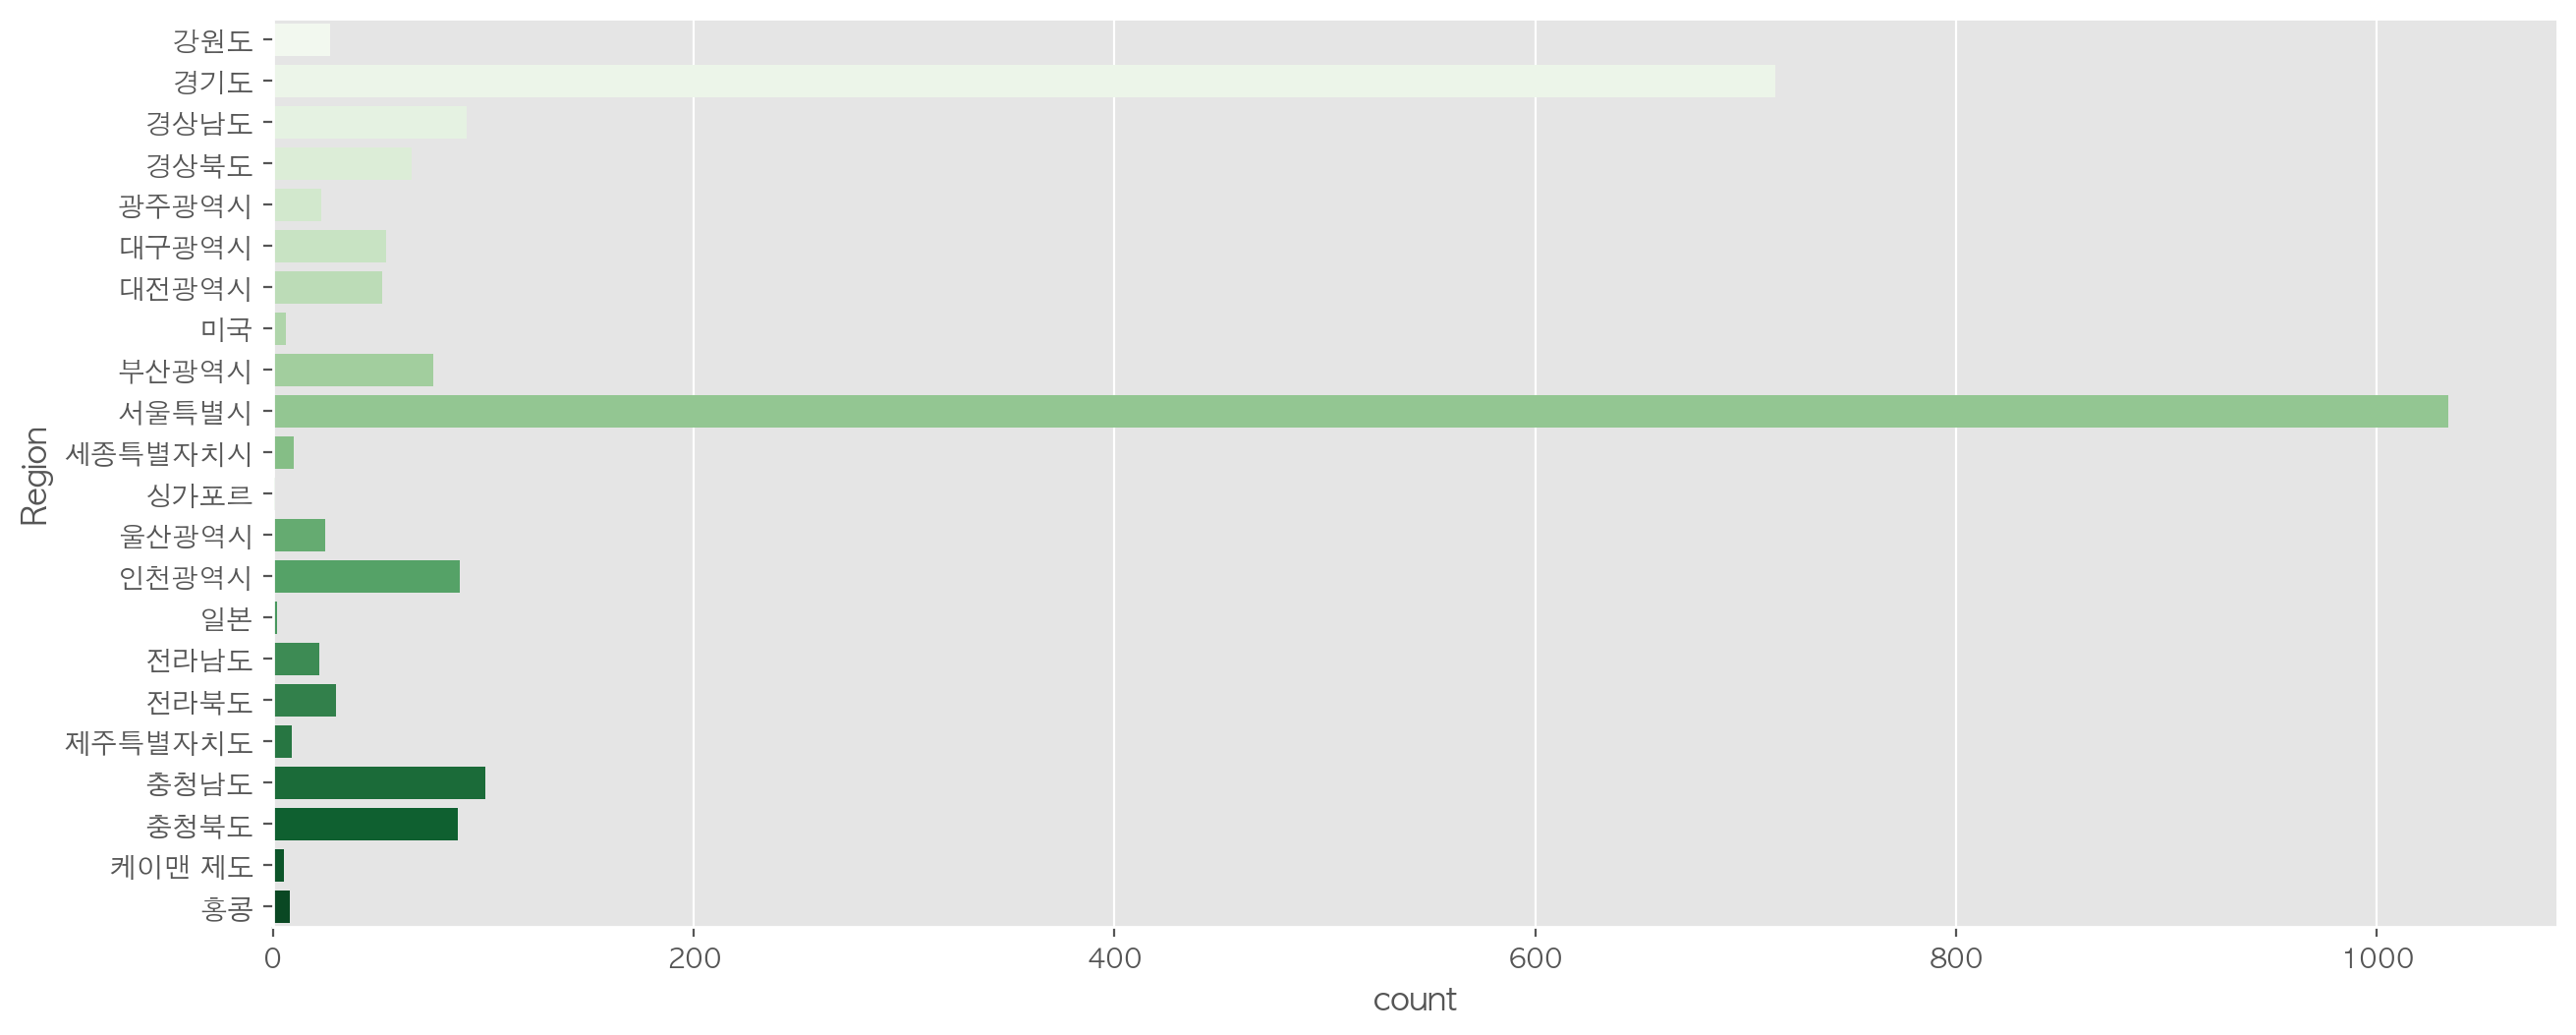

In [130]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df.sort_values(by="Region"), 
              palette="Greens",
              y="Region")

## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [131]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기
pd.set_option('display.max_column', 25)
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,세종특별자치시,싱가포르,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,,
KONEX,5,33,1,4,4,1,6,0,2,46,1,0,0,3,0,3,1,1,5,9,0,0
KOSDAQ,18,533,48,43,10,32,39,6,39,563,6,0,9,62,2,12,17,2,70,63,4,8
KOSPI,4,148,43,19,9,21,7,0,35,425,3,1,16,24,0,7,12,6,26,16,1,0


<Axes: xlabel='count', ylabel='Region'>

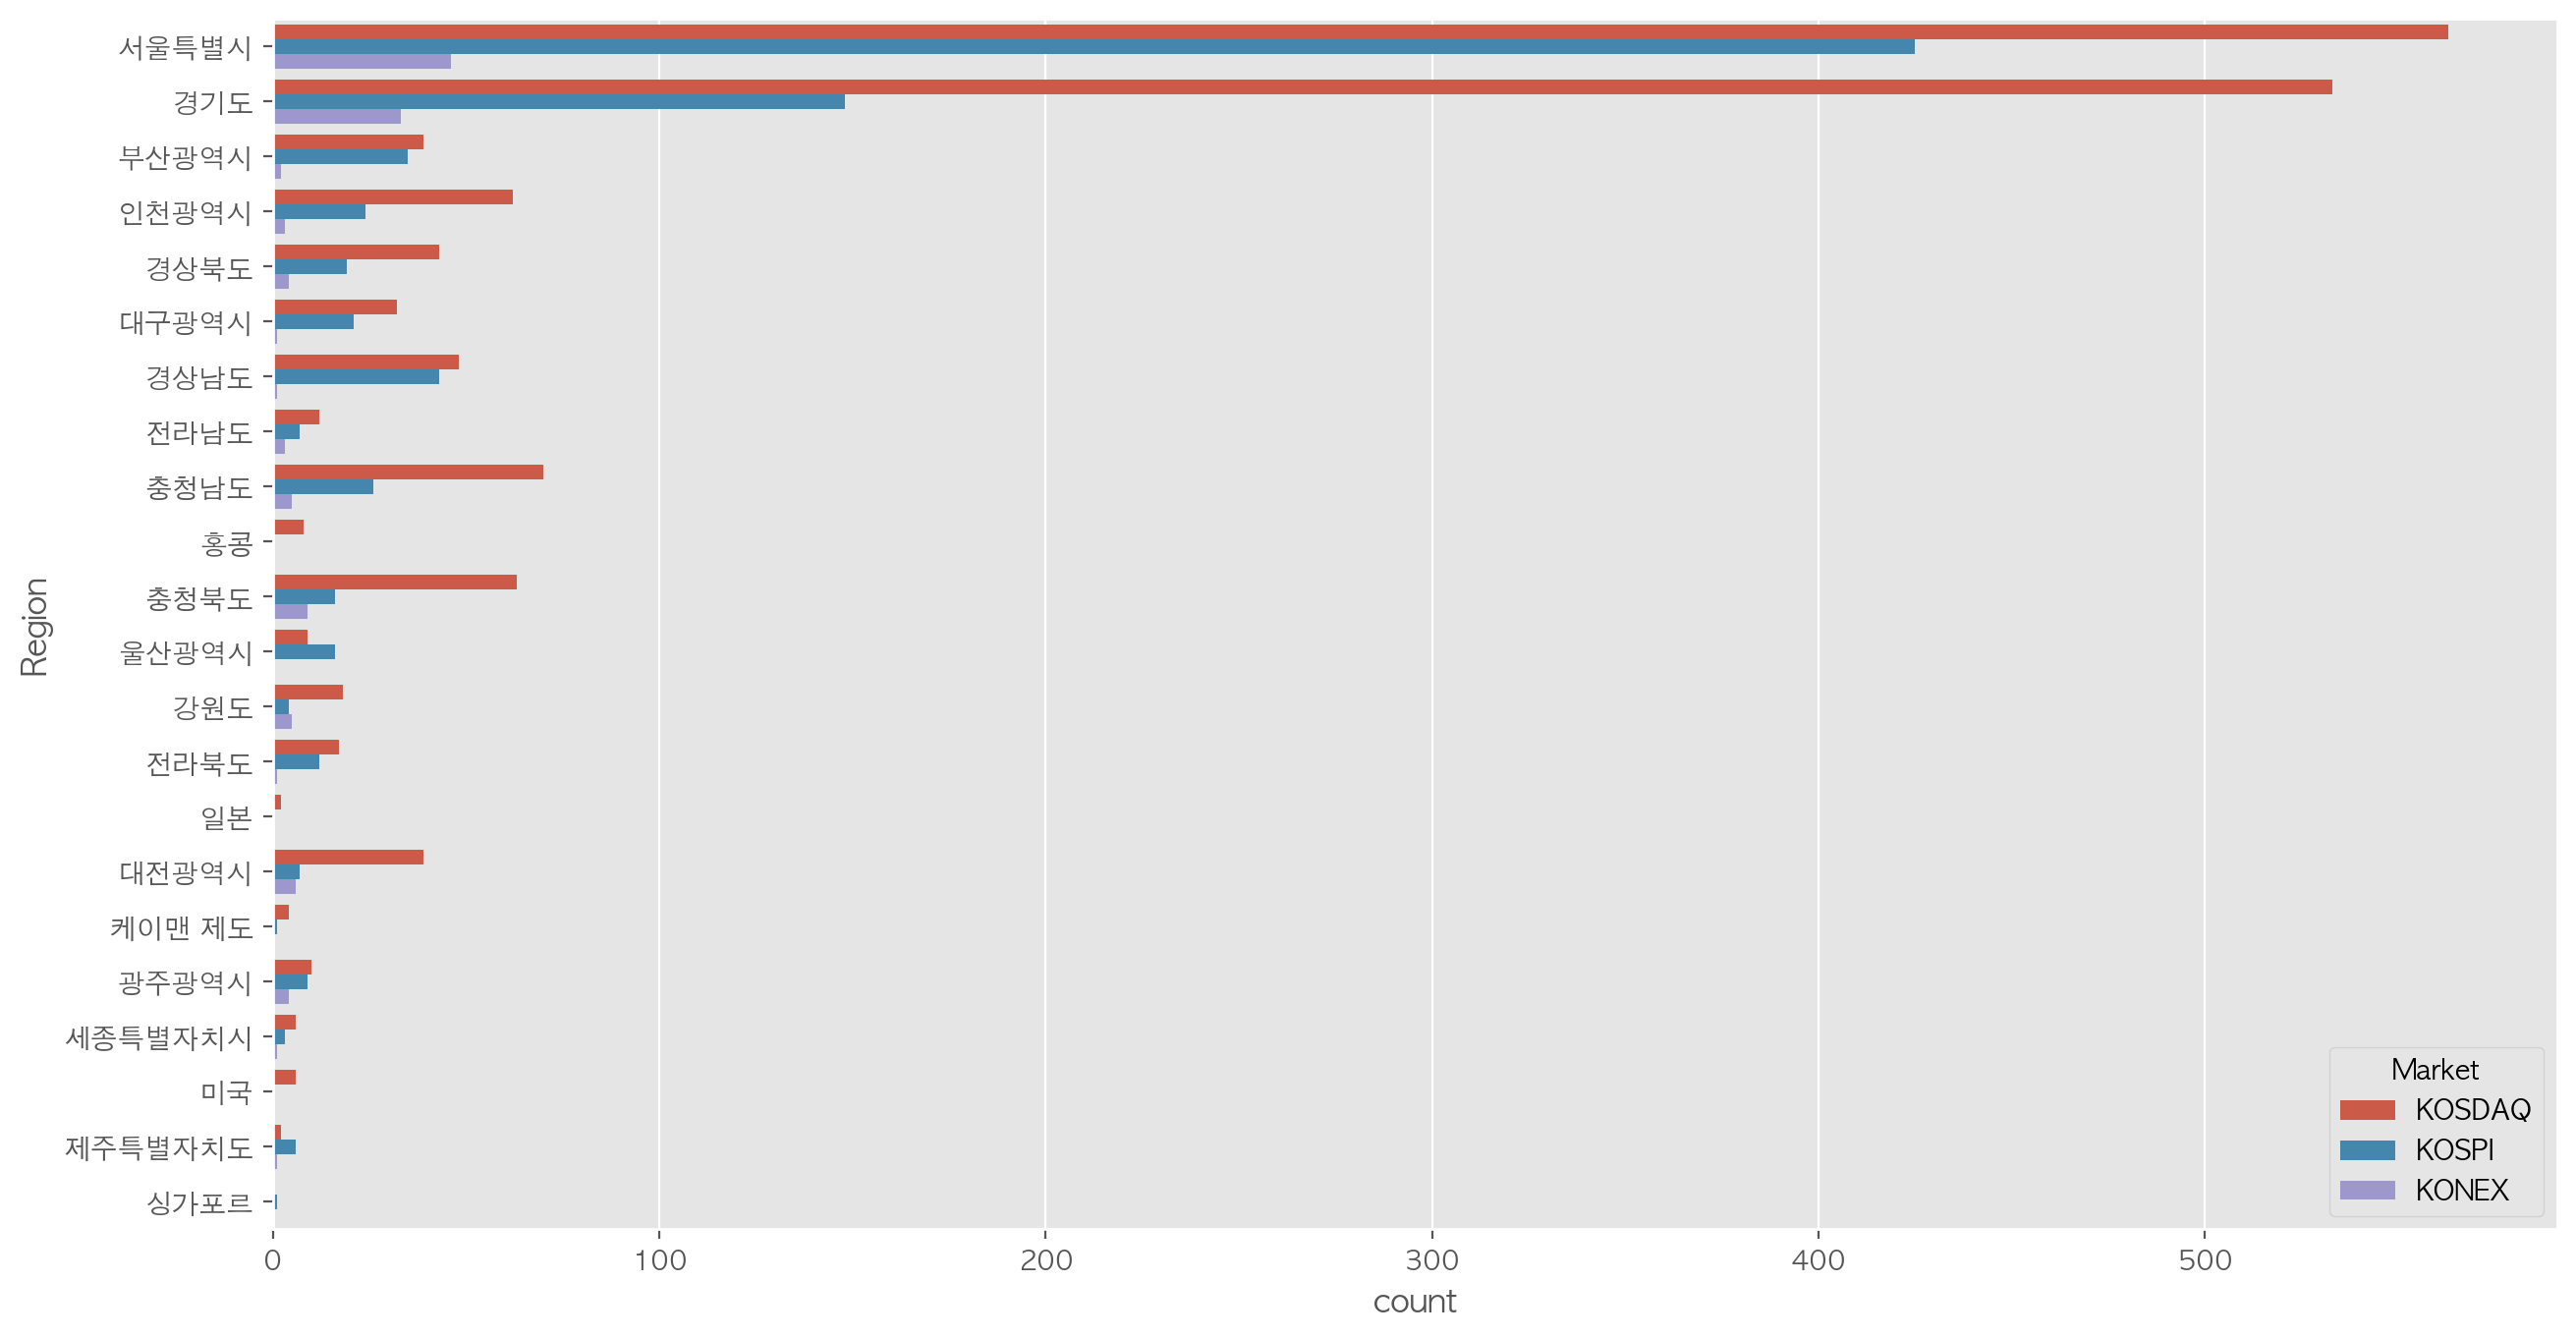

In [132]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기
plt.figure(figsize=(15, 8))
sns.countplot(data=df, y="Region", hue="Market")

### 연도별 상장 종목 빈도수 분석

In [133]:
# Market, ListingYear 빈도수 구하기
pd.set_option('display.max_column', 60)
df_market_year = pd.crosstab(df["Market"], df["ListingYear"])
df_market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
Market,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,10,23,19,14,13,12,11,7,5
KOSDAQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,4,10,17,34,14,19,37,1,38,80,81,81,43,35,47,39,56,29,46,58,52,18,35,58,87,59,68,85,87,86,100,76
KOSPI,5,1,1,1,6,5,4,1,3,21,11,31,51,17,10,3,1,1,1,5,8,8,21,50,52,21,11,3,4,16,14,31,16,3,15,4,12,19,15,13,16,20,17,17,18,28,25,12,10,9,17,18,20,19,15,14,27,6


### seaborn을 통한 빈도수 시각화

<Axes: xlabel='ListingYear', ylabel='count'>

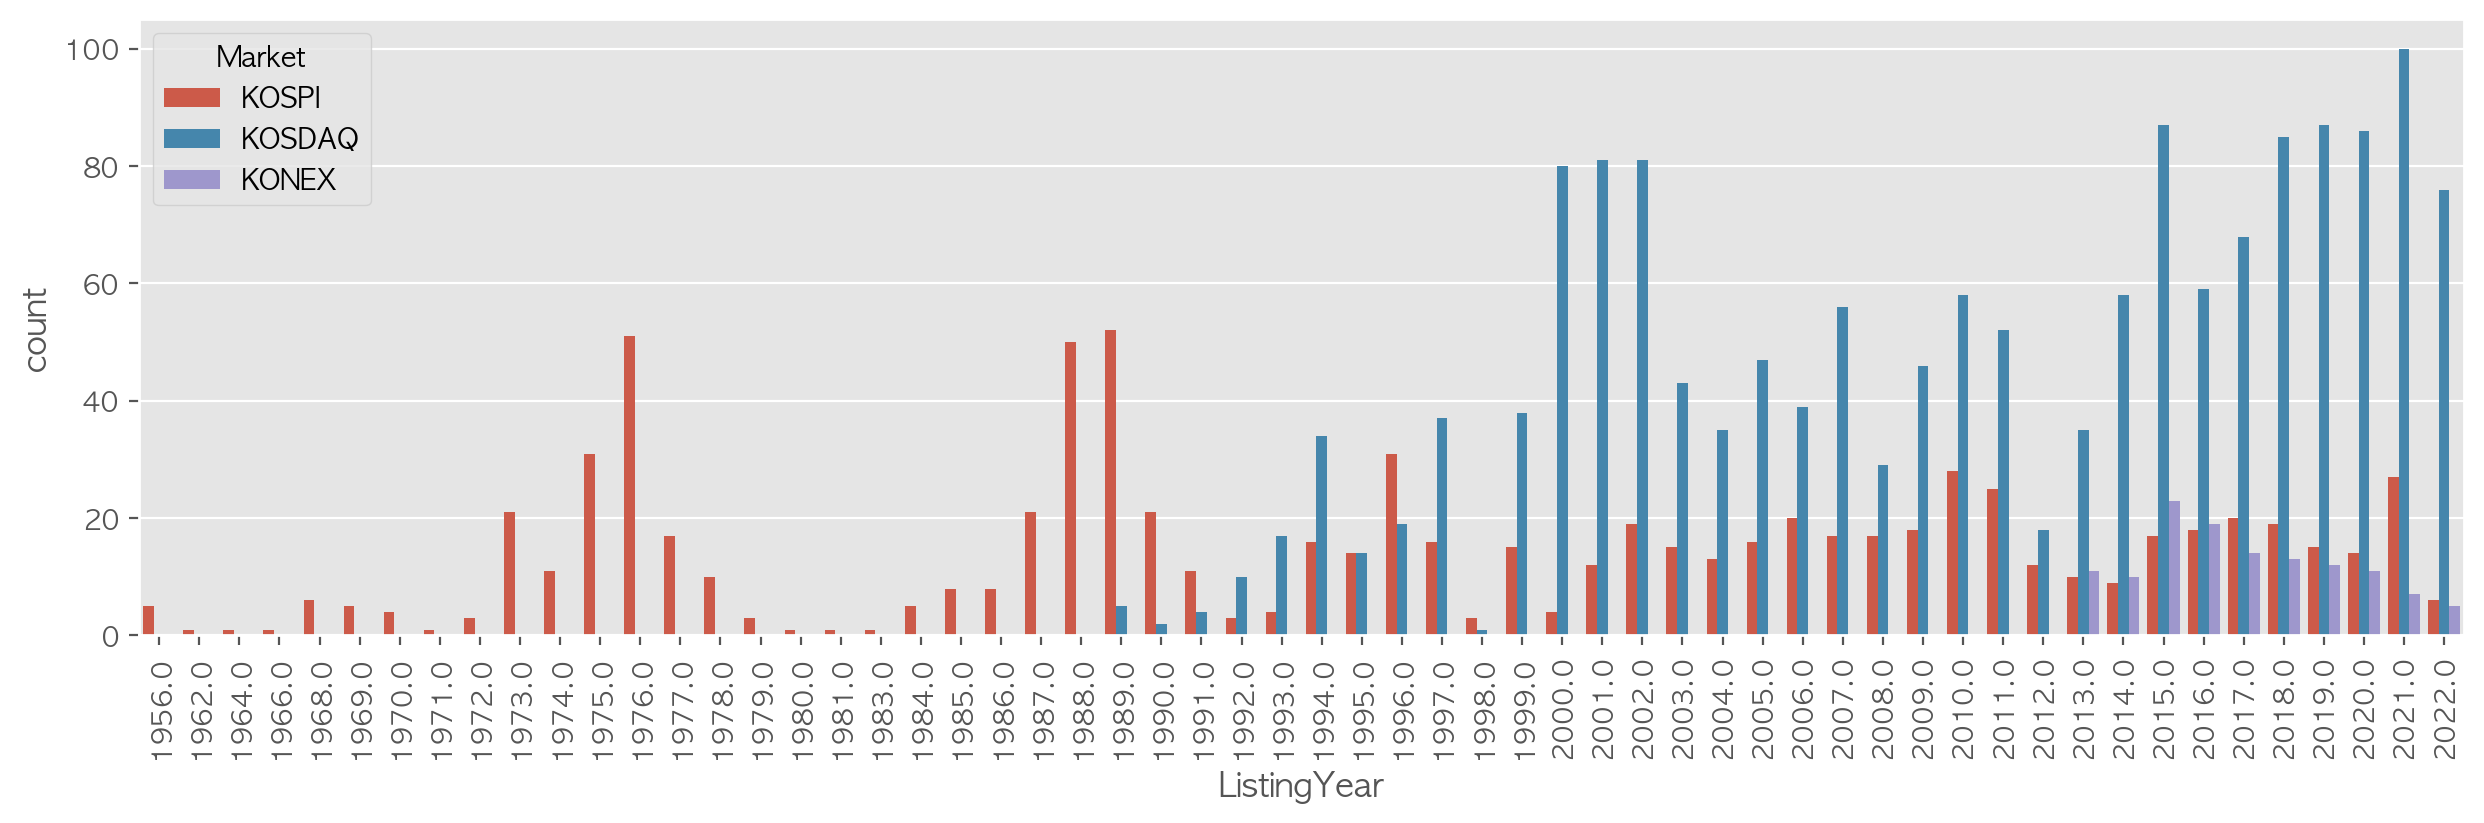

In [134]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.countplot(data=df, x="ListingYear", hue="Market")

### Pandas를 통한 시각화

In [135]:
df_market_year.T.head()

Market,KONEX,KOSDAQ,KOSPI
ListingYear,,,
1956.0,0,0,5
1962.0,0,0,1
1964.0,0,0,1
1966.0,0,0,1
1968.0,0,0,6


<Axes: xlabel='ListingYear'>

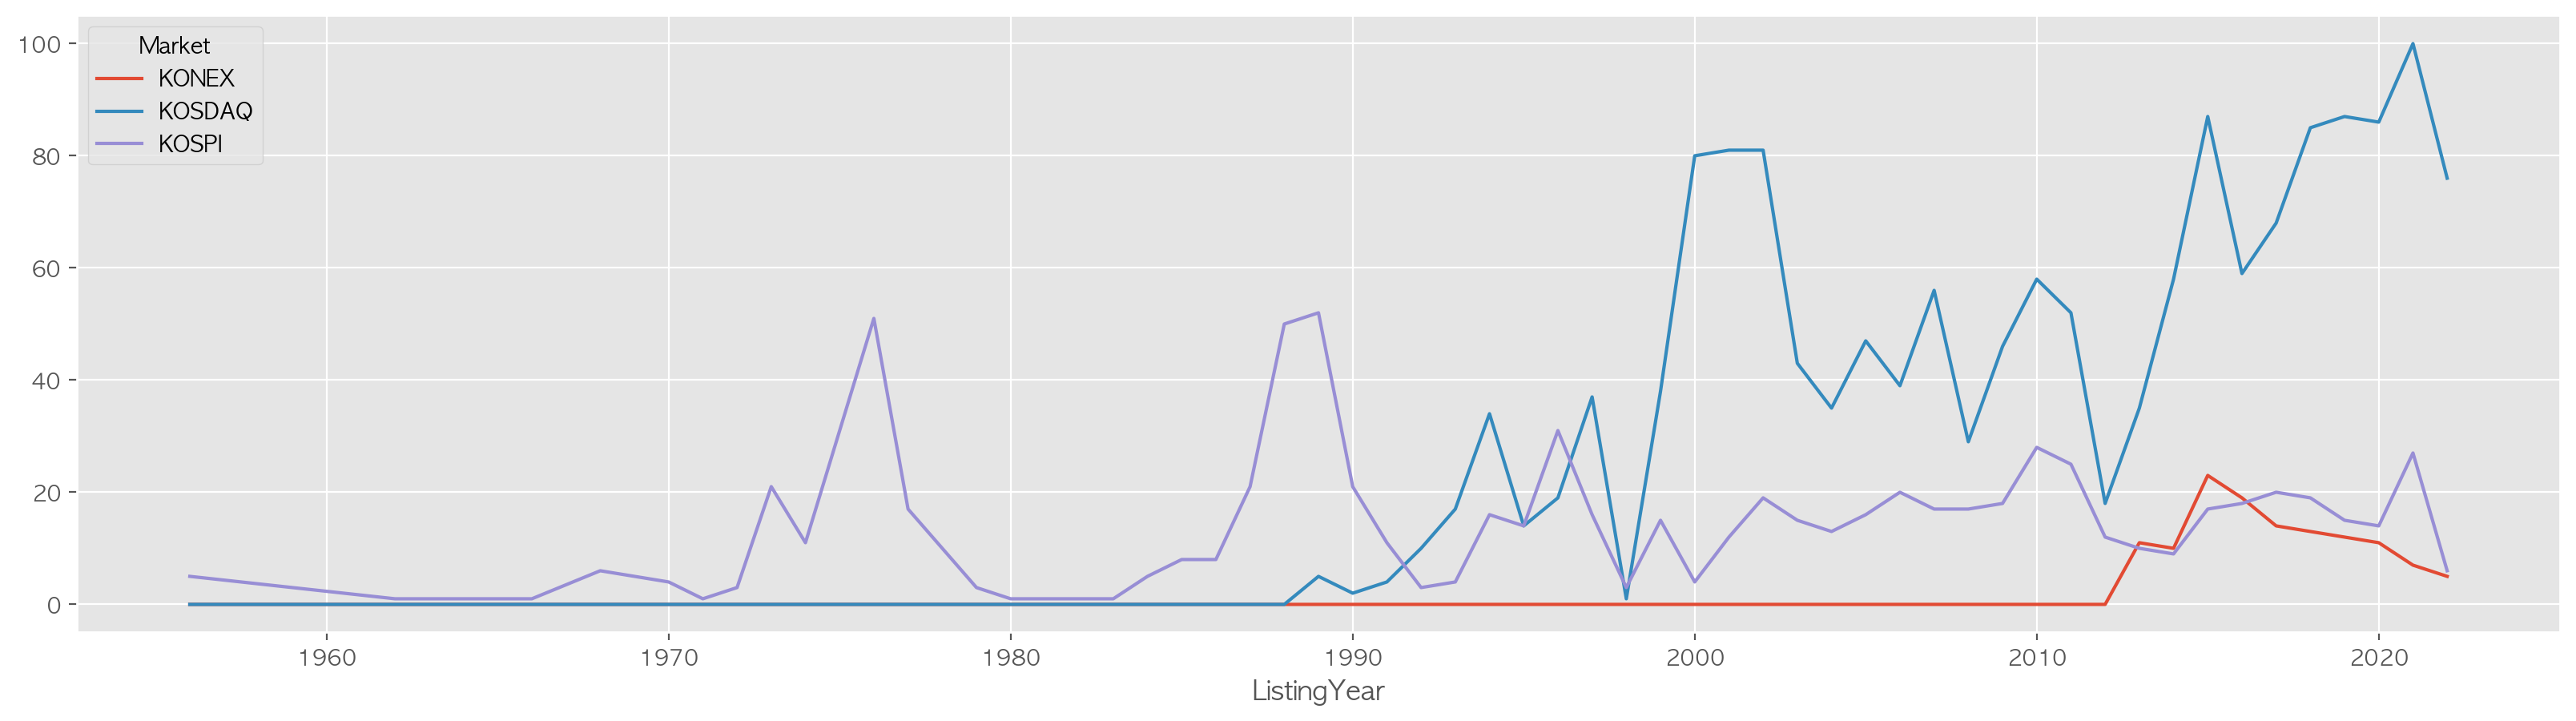

In [136]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# # 컬럼이 여러개라면 다른 색상으로 그려집니다. 
df_market_year.T.plot(figsize=(20, 5))

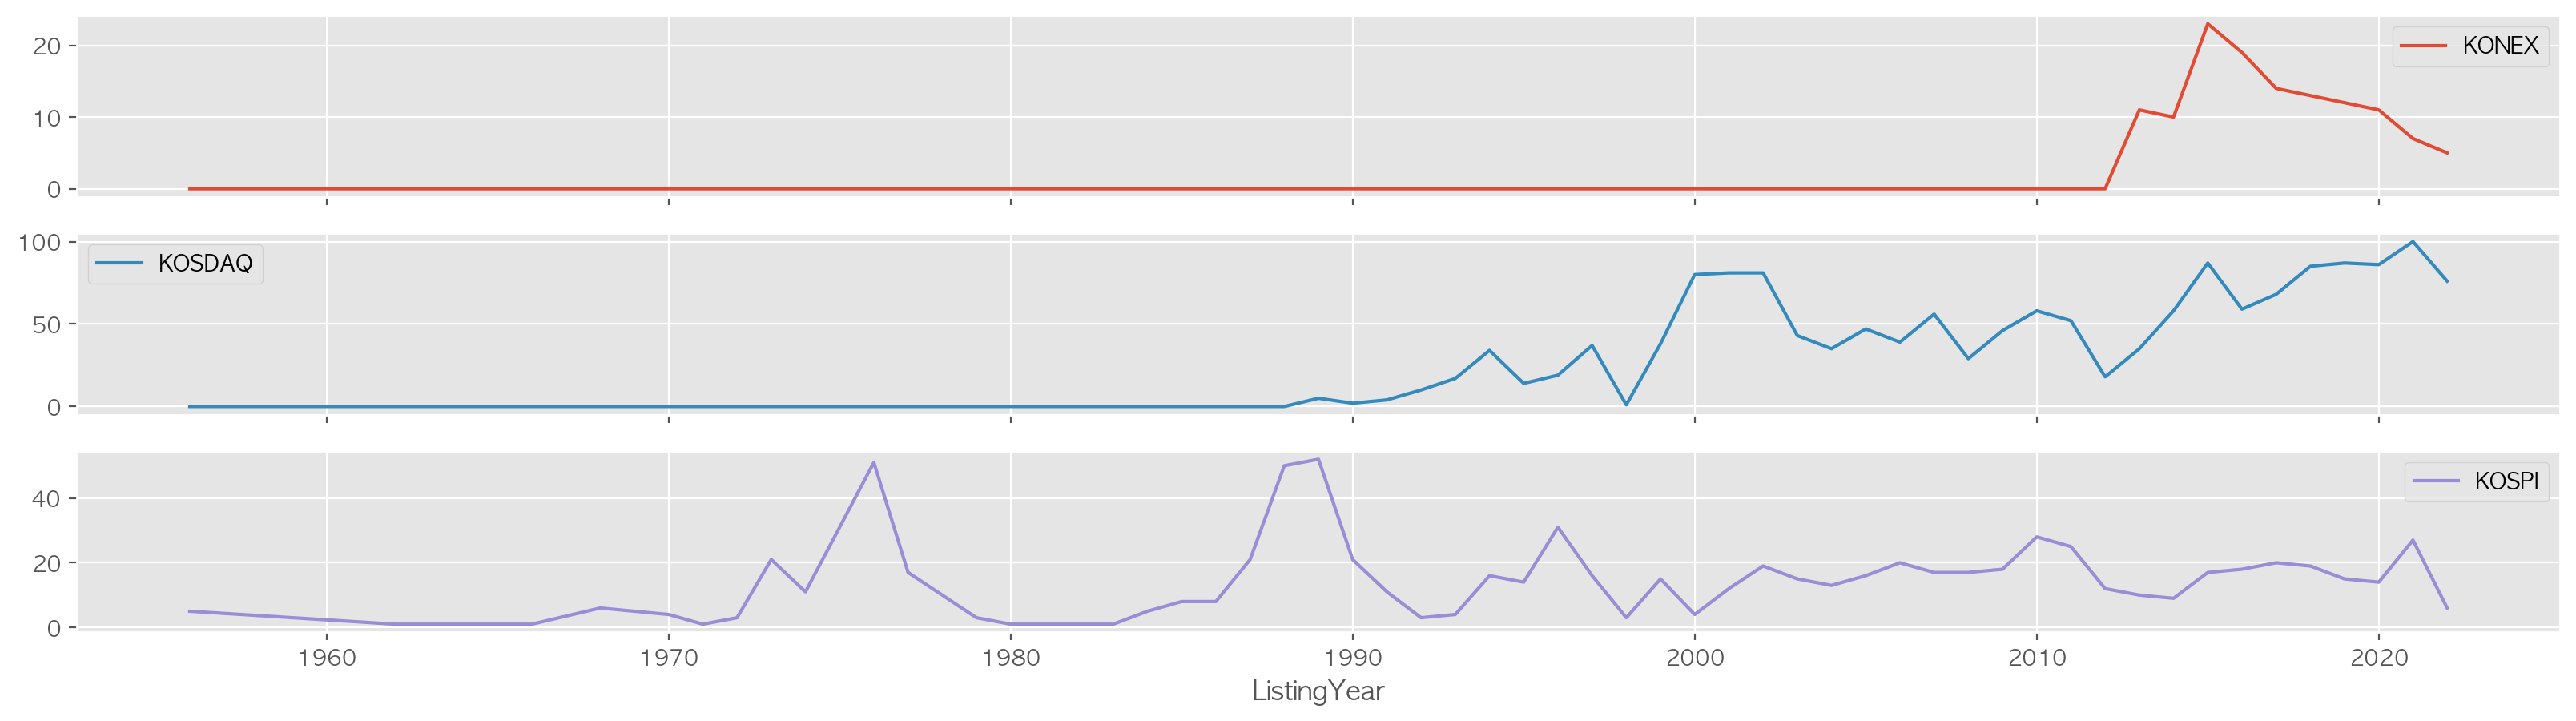

In [137]:
# 컬럼값을 subplots 으로 그립니다.
g = df_market_year.T.plot(subplots=True, figsize=(20, 5))

<Axes: xlabel='ListingYear'>

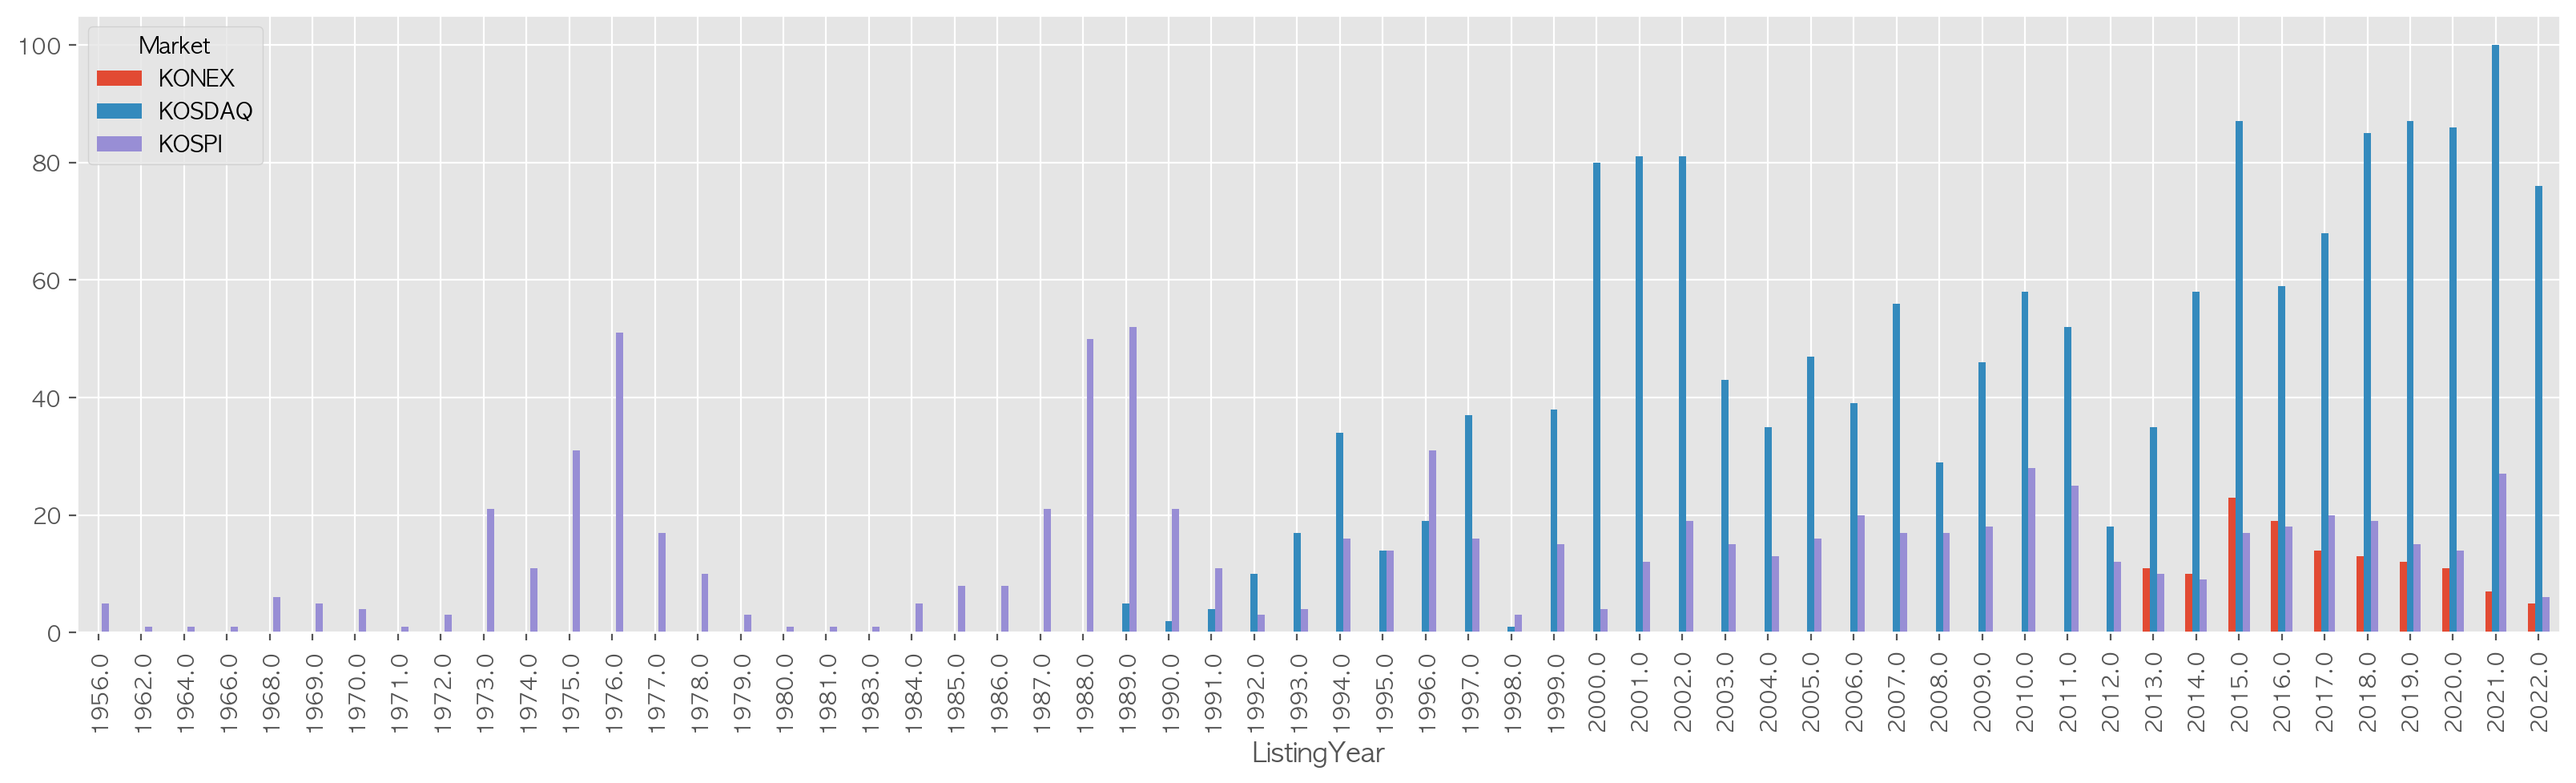

In [138]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그립니다.
df_market_year.T.plot.bar(figsize=(20, 5))

In [139]:
df_market_year.columns

Index([1956.0, 1962.0, 1964.0, 1966.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0,
       1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0,
       1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0,
       1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0,
       2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
       2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0,
       2019.0, 2020.0, 2021.0, 2022.0],
      dtype='float64', name='ListingYear')

In [140]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
df_market_year.columns = df_market_year.columns.astype(int)
df_market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Market,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,10,23,19,14,13,12,11,7,5
KOSDAQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,4,10,17,34,14,19,37,1,38,80,81,81,43,35,47,39,56,29,46,58,52,18,35,58,87,59,68,85,87,86,100,76
KOSPI,5,1,1,1,6,5,4,1,3,21,11,31,51,17,10,3,1,1,1,5,8,8,21,50,52,21,11,3,4,16,14,31,16,3,15,4,12,19,15,13,16,20,17,17,18,28,25,12,10,9,17,18,20,19,15,14,27,6


<Axes: xlabel='ListingYear'>

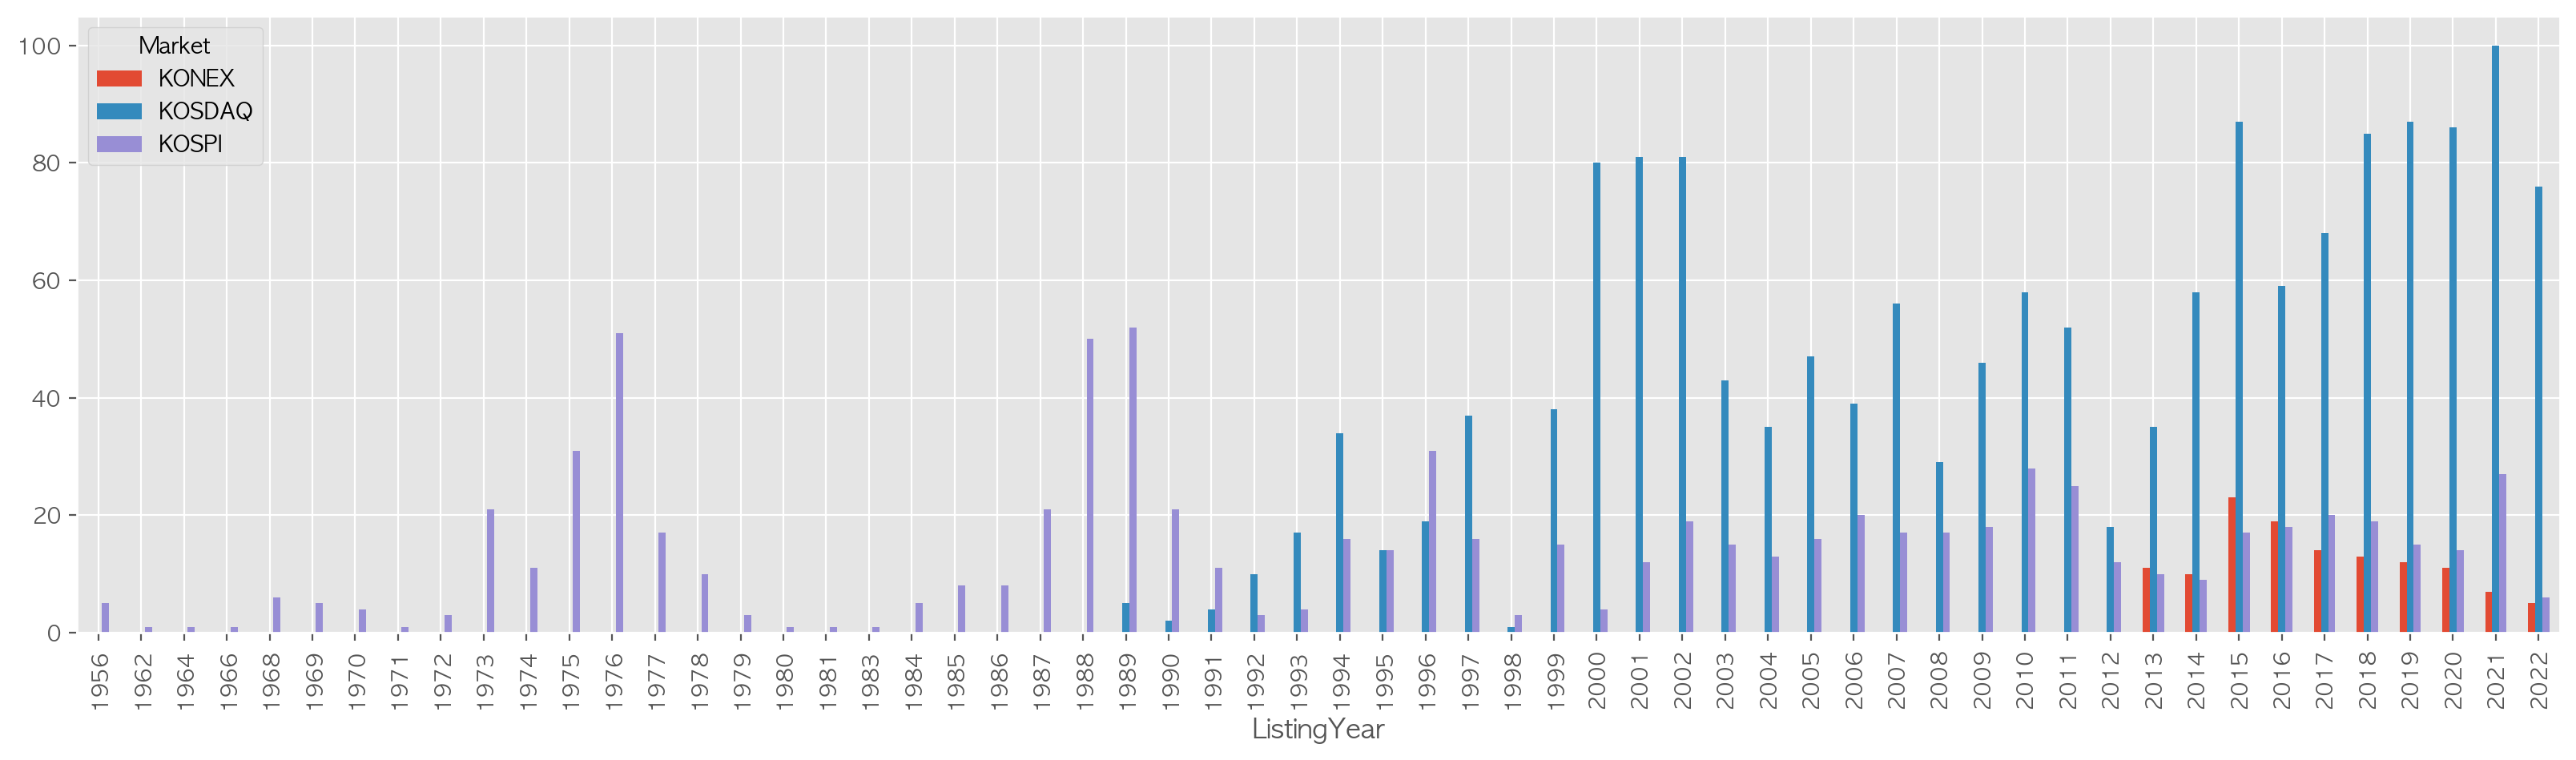

In [141]:
# 막대(bar)그래프 그리기
df_market_year.T.plot.bar(figsize=(20, 5))

### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas 1.2.0 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [142]:
df

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시,2002.0
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시,2015.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
...,...,...,...,...,...,...,...,...,...,...,...
7869,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7870,437550,KOSPI,히어로즈 글로벌리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7871,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
7872,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [143]:
df.groupby(["ListingYear", "Market"])["Symbol"].count()

ListingYear  Market
1956.0       KOSPI       5
1962.0       KOSPI       1
1964.0       KOSPI       1
1966.0       KOSPI       1
1968.0       KOSPI       6
                      ... 
2021.0       KOSDAQ    100
             KOSPI      27
2022.0       KONEX       5
             KOSDAQ     76
             KOSPI       6
Name: Symbol, Length: 102, dtype: int64

In [144]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
df_year_market = df.groupby(["ListingYear", "Market"])["Symbol"].count().reset_index(name="count")
df_year_market 

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
97,2021.0,KOSDAQ,100
98,2021.0,KOSPI,27
99,2022.0,KONEX,5
100,2022.0,KOSDAQ,76


In [145]:
# pivot_table로 같은 결과가 나오게 연산하기
df_year_market = pd.pivot_table(data=df, index=["ListingYear", "Market"], values="Symbol", aggfunc="count")
df_year_market

Symbol
ListingYear Market        
1956.0      KOSPI        5
1962.0      KOSPI        1
1964.0      KOSPI        1
1966.0      KOSPI        1
1968.0      KOSPI        6
...                    ...
2021.0      KOSDAQ     100
            KOSPI       27
2022.0      KONEX        5
            KOSDAQ      76
            KOSPI        6

[102 rows x 1 columns]

In [146]:
df_year_market = df_year_market.reset_index()
df_year_market = df_year_market.rename(columns={"Symbol":"count"})
df_year_market

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
97,2021.0,KOSDAQ,100
98,2021.0,KOSPI,27
99,2022.0,KONEX,5
100,2022.0,KOSDAQ,76


<Axes: xlabel='ListingYear', ylabel='count'>

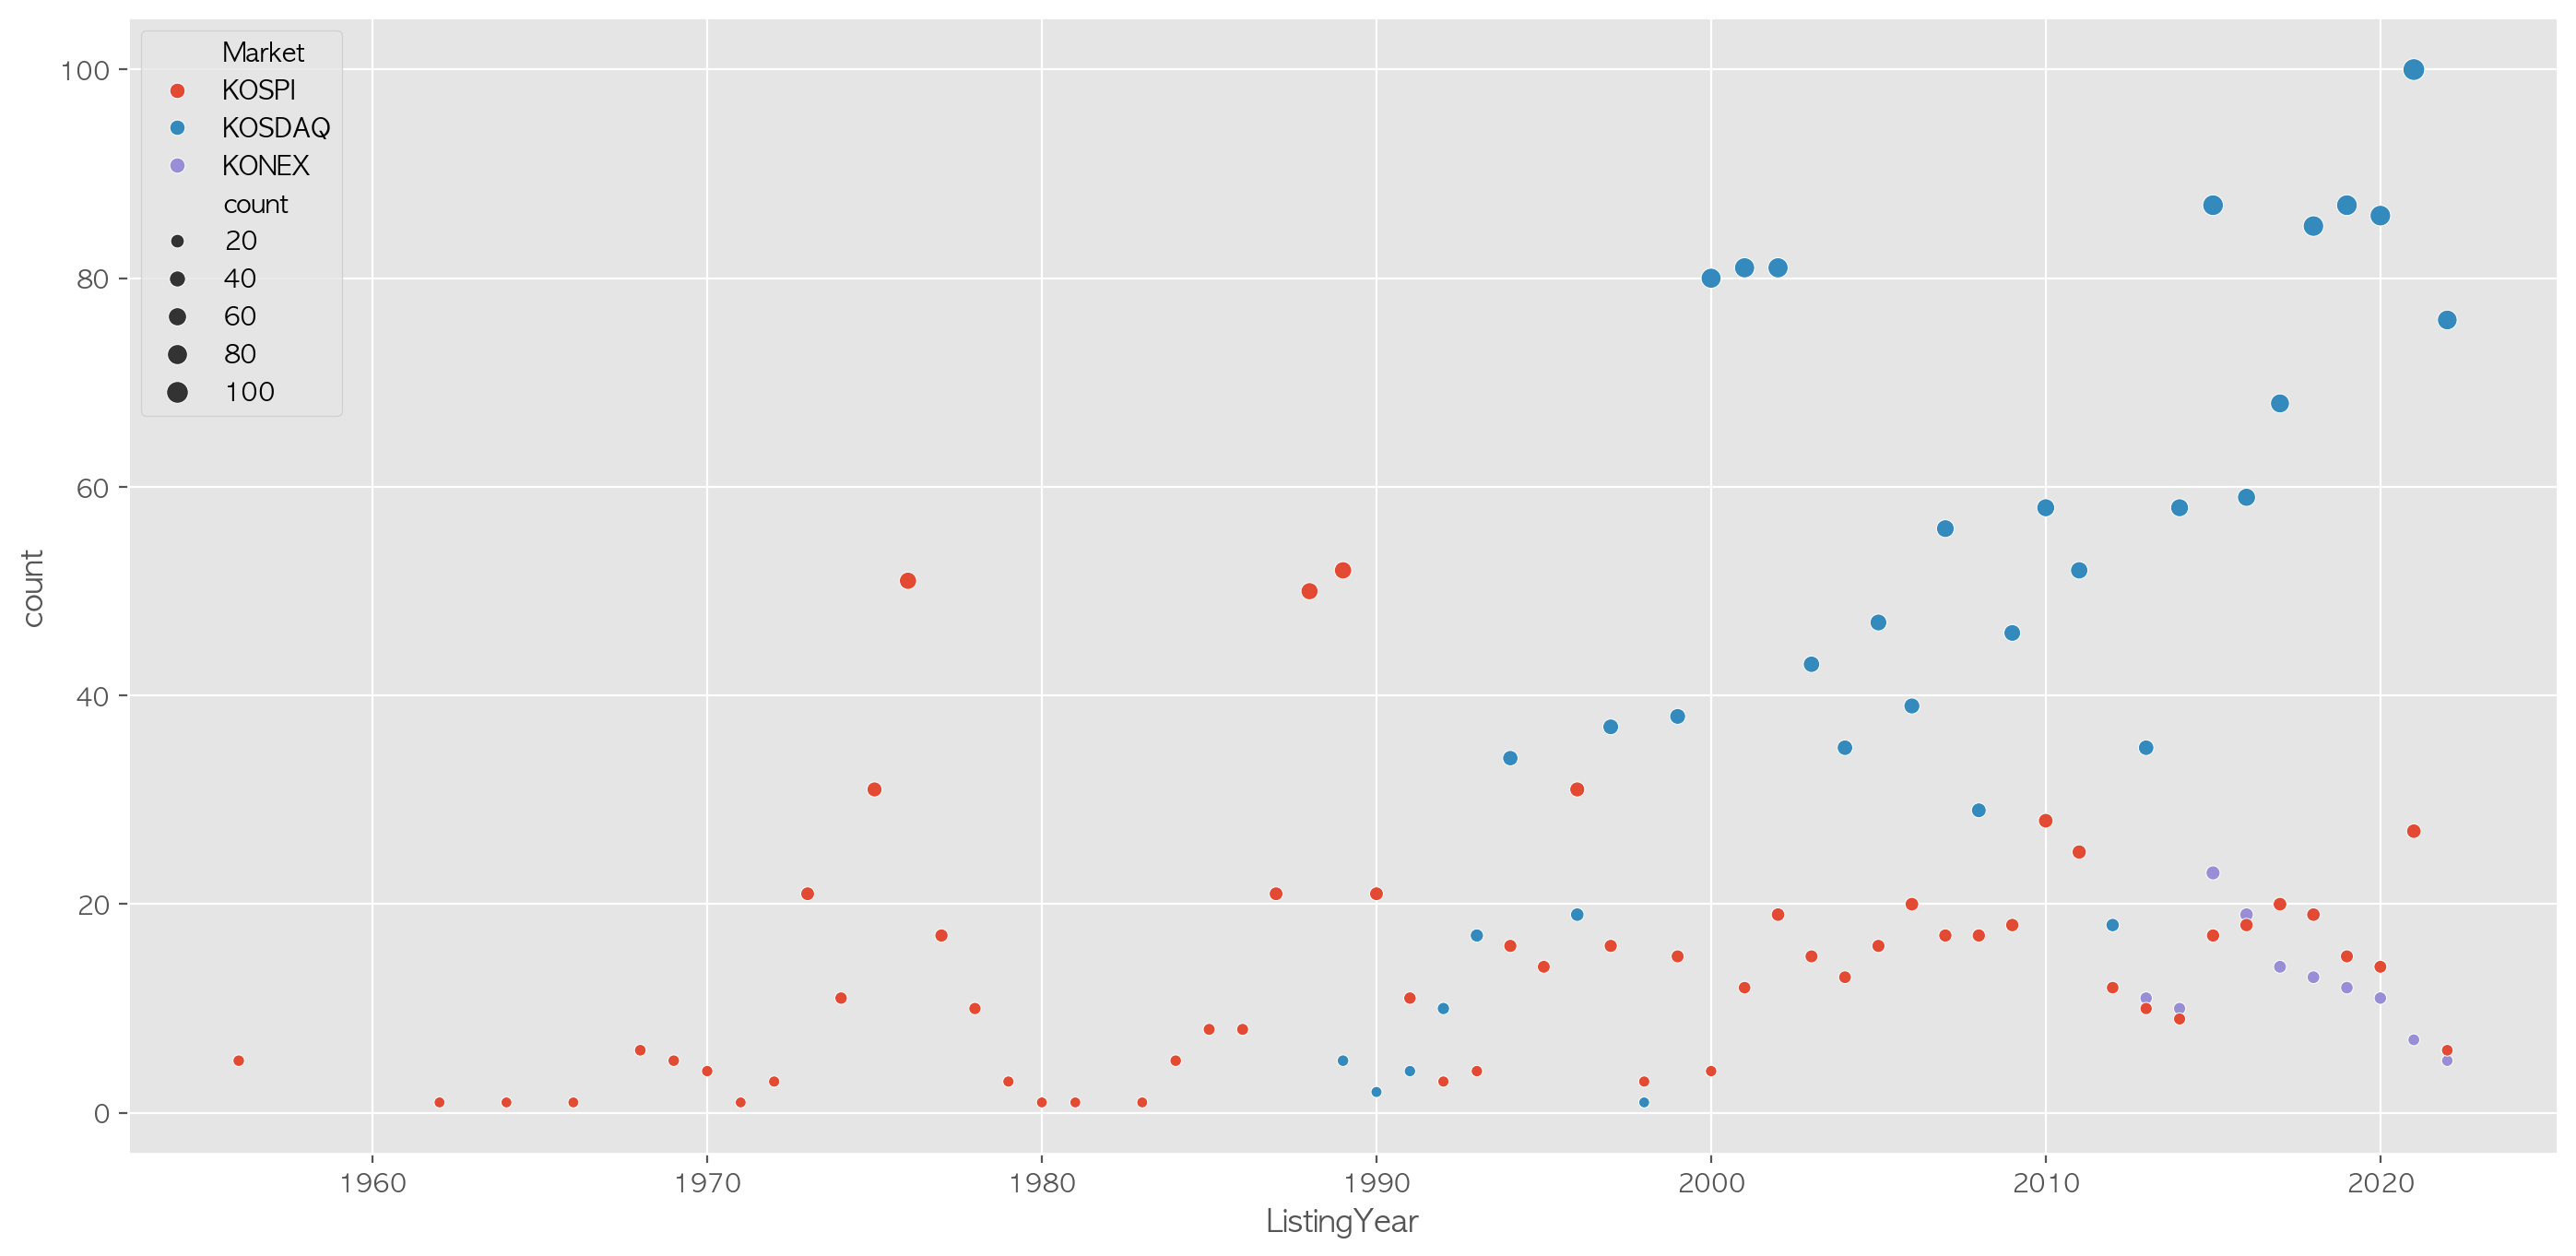

In [147]:
# 위의 groupby 결과를 scatterplot으로 그립니다.
plt.figure(figsize=(17, 8))
sns.scatterplot(data=df_year_market, 
                x="ListingYear", y="count", 
                hue="Market", size="count")

/var/folders/2w/p0zgpvps62gb8jlzgy_v7zgh0000gn/T/ipykernel_2314/1459778035.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year_market, x="ListingYear", y="count", hue="Market", ci=None)


<Axes: xlabel='ListingYear', ylabel='count'>

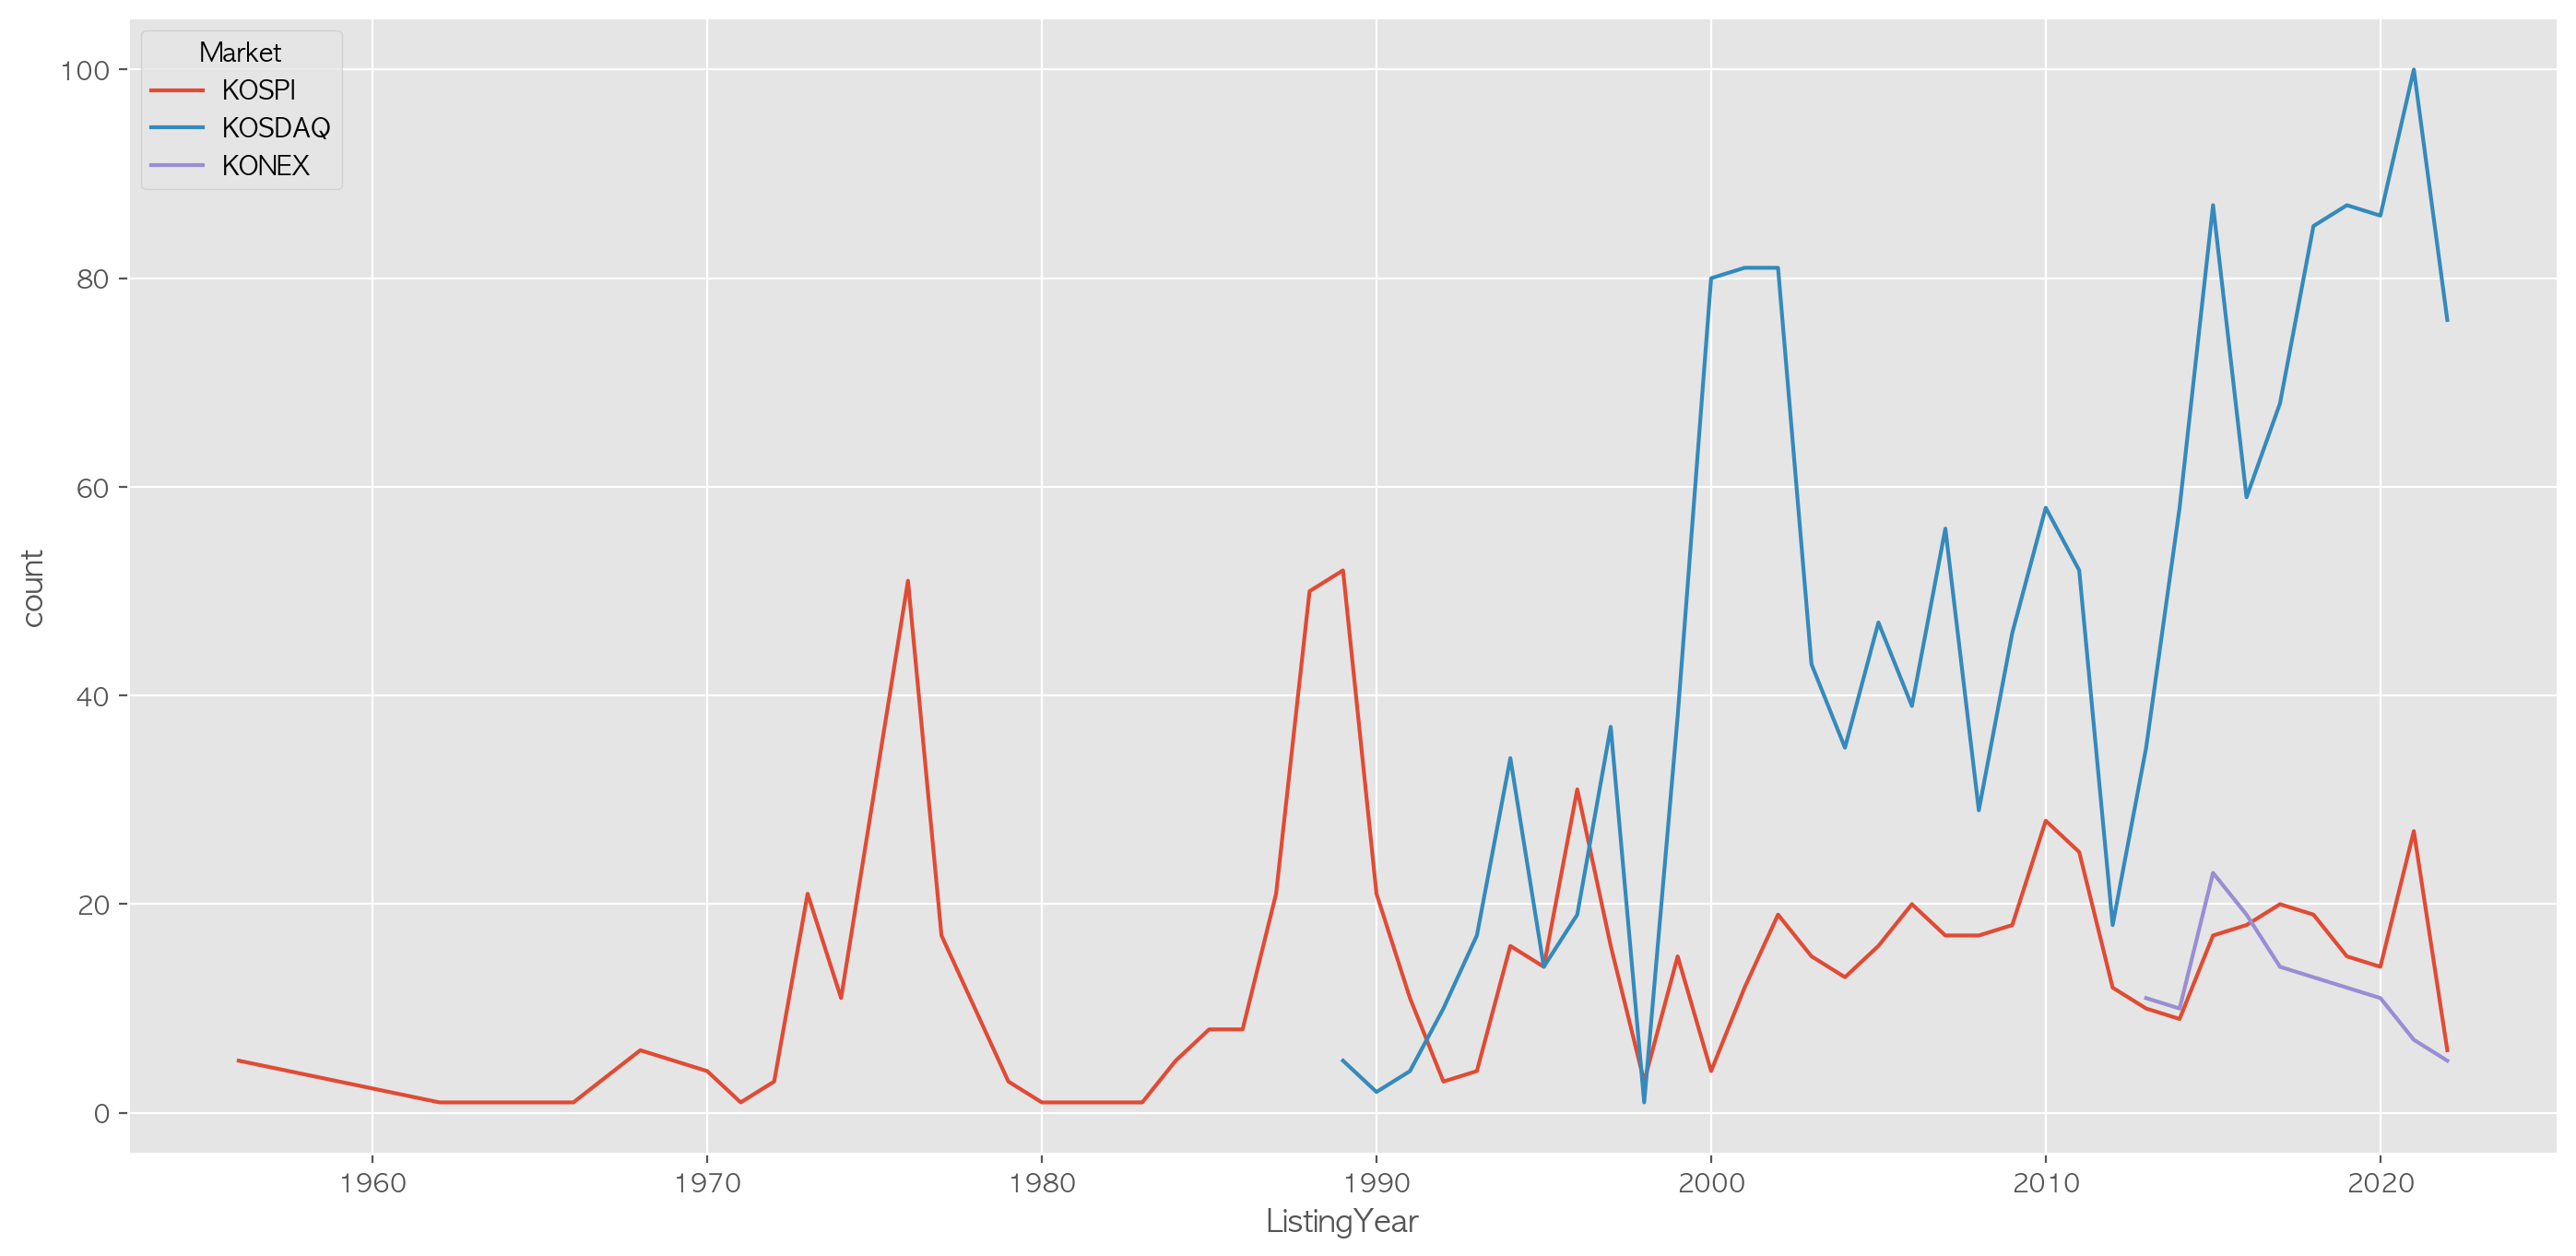

In [148]:
# lineplot 그리기
plt.figure(figsize=(17, 8))
sns.lineplot(data=df_year_market, x="ListingYear", y="count", hue="Market", ci=None)

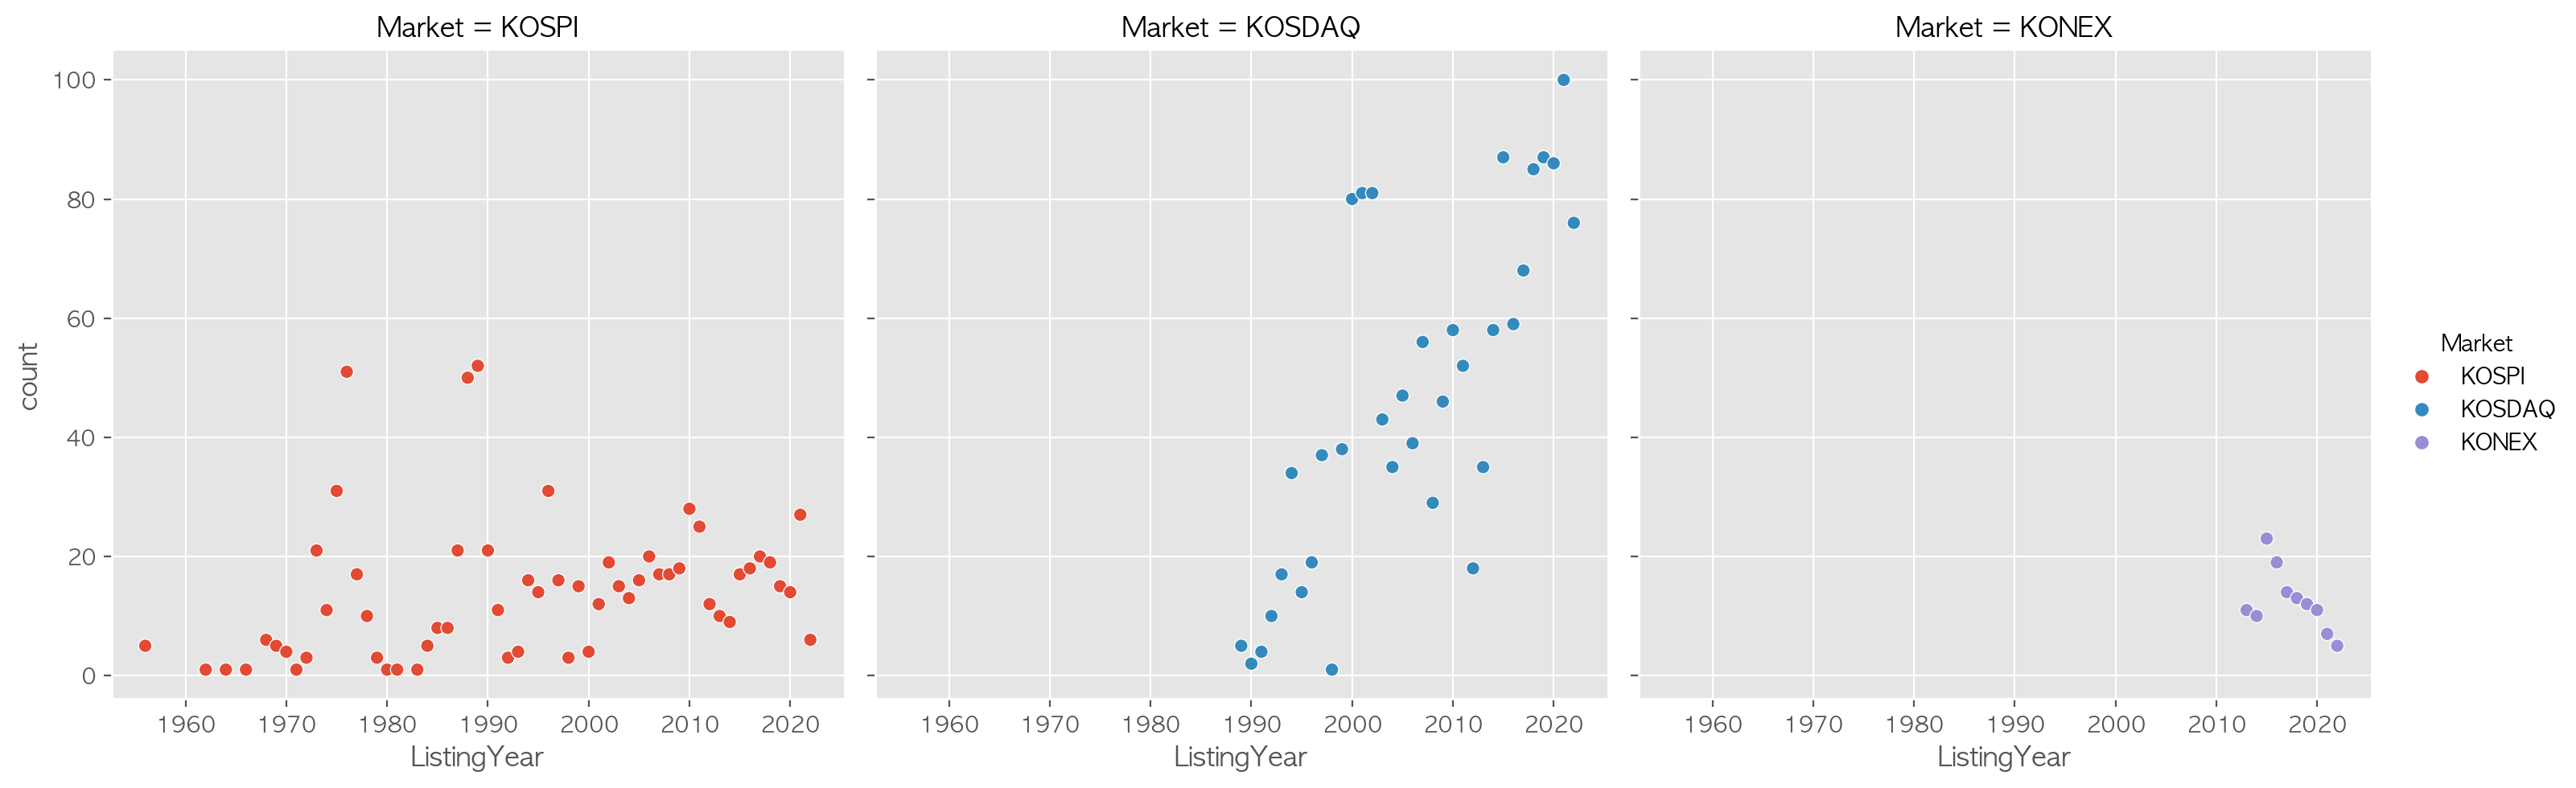

In [149]:
# relplot으로 subplot 그리기 - scatter
sns.relplot(data=df_year_market, x="ListingYear", y="count", 
            col="Market", hue="Market")

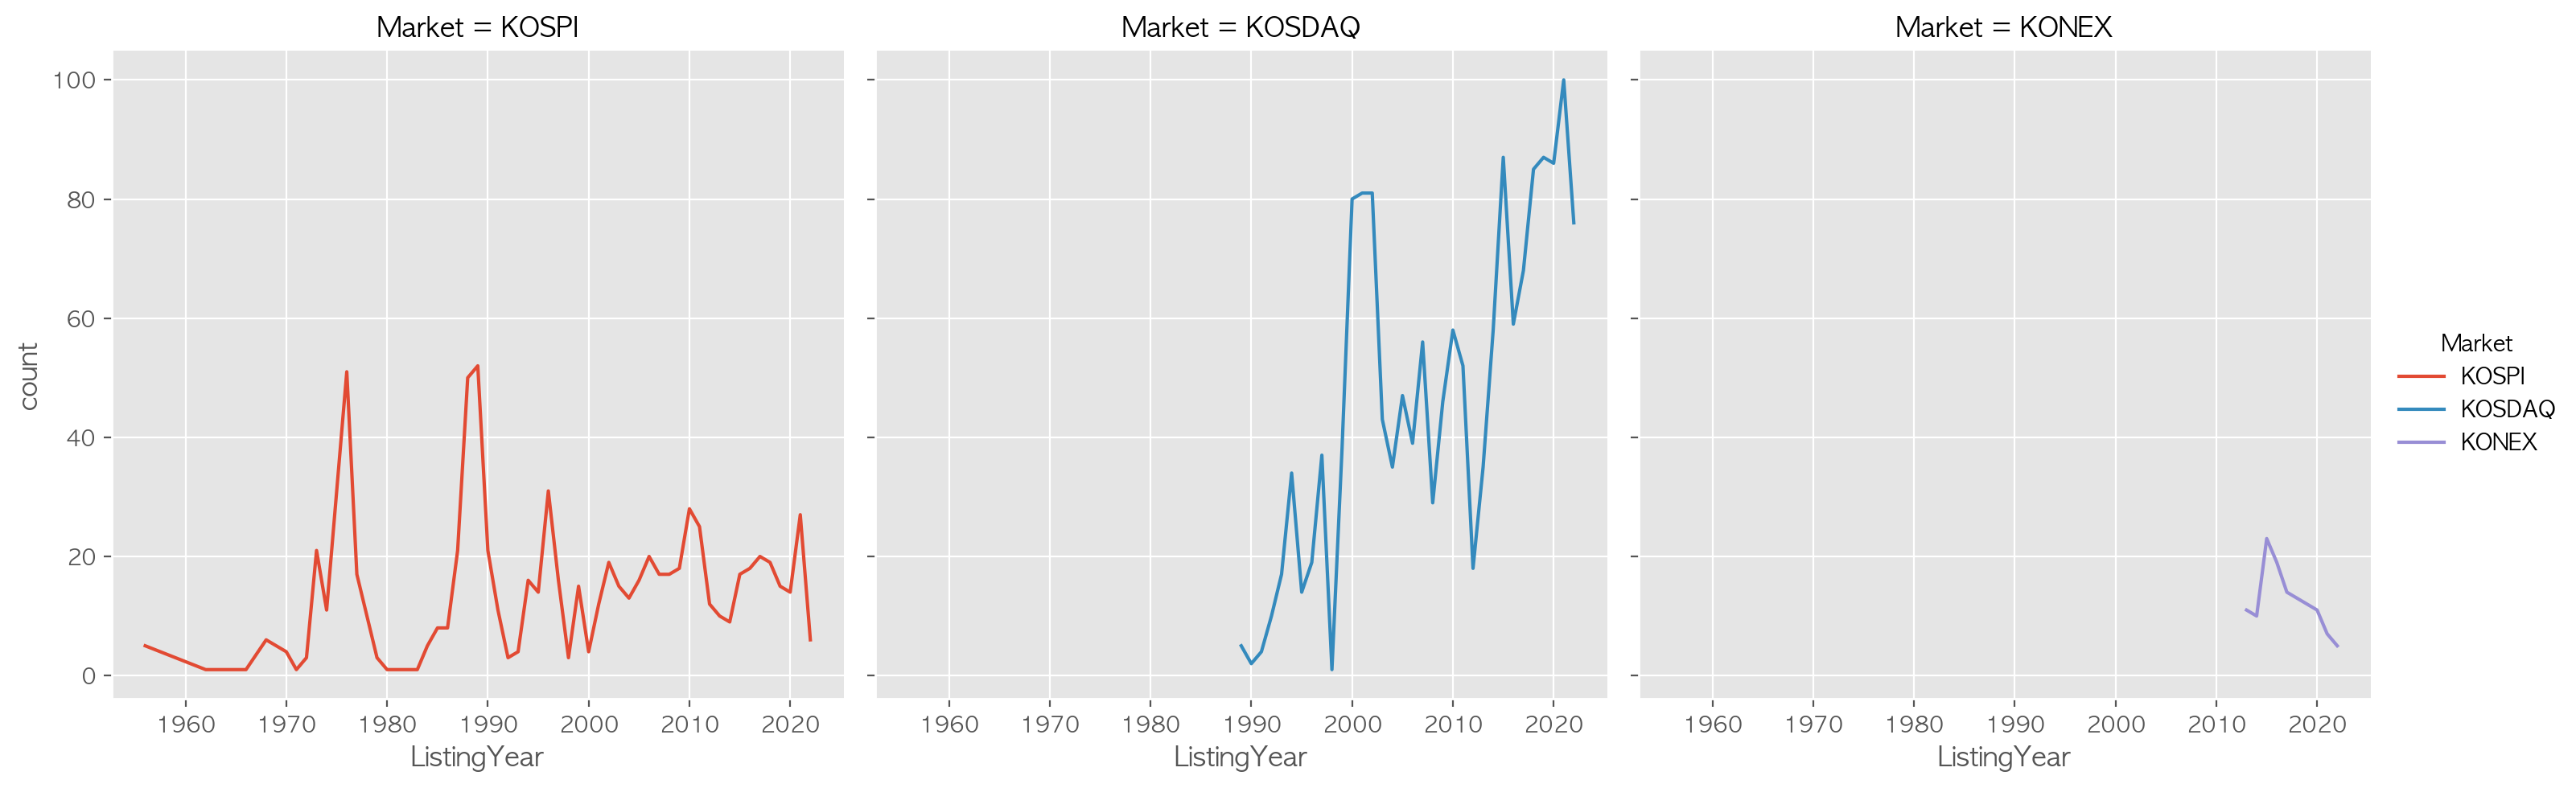

In [150]:
# relplot으로 subplot 그리기 - line
sns.relplot(data=df_year_market, x="ListingYear", y="count", 
        col="Market", hue="Market", kind="line")

### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

<Axes: title={'center': '상장연도'}, ylabel='Frequency'>

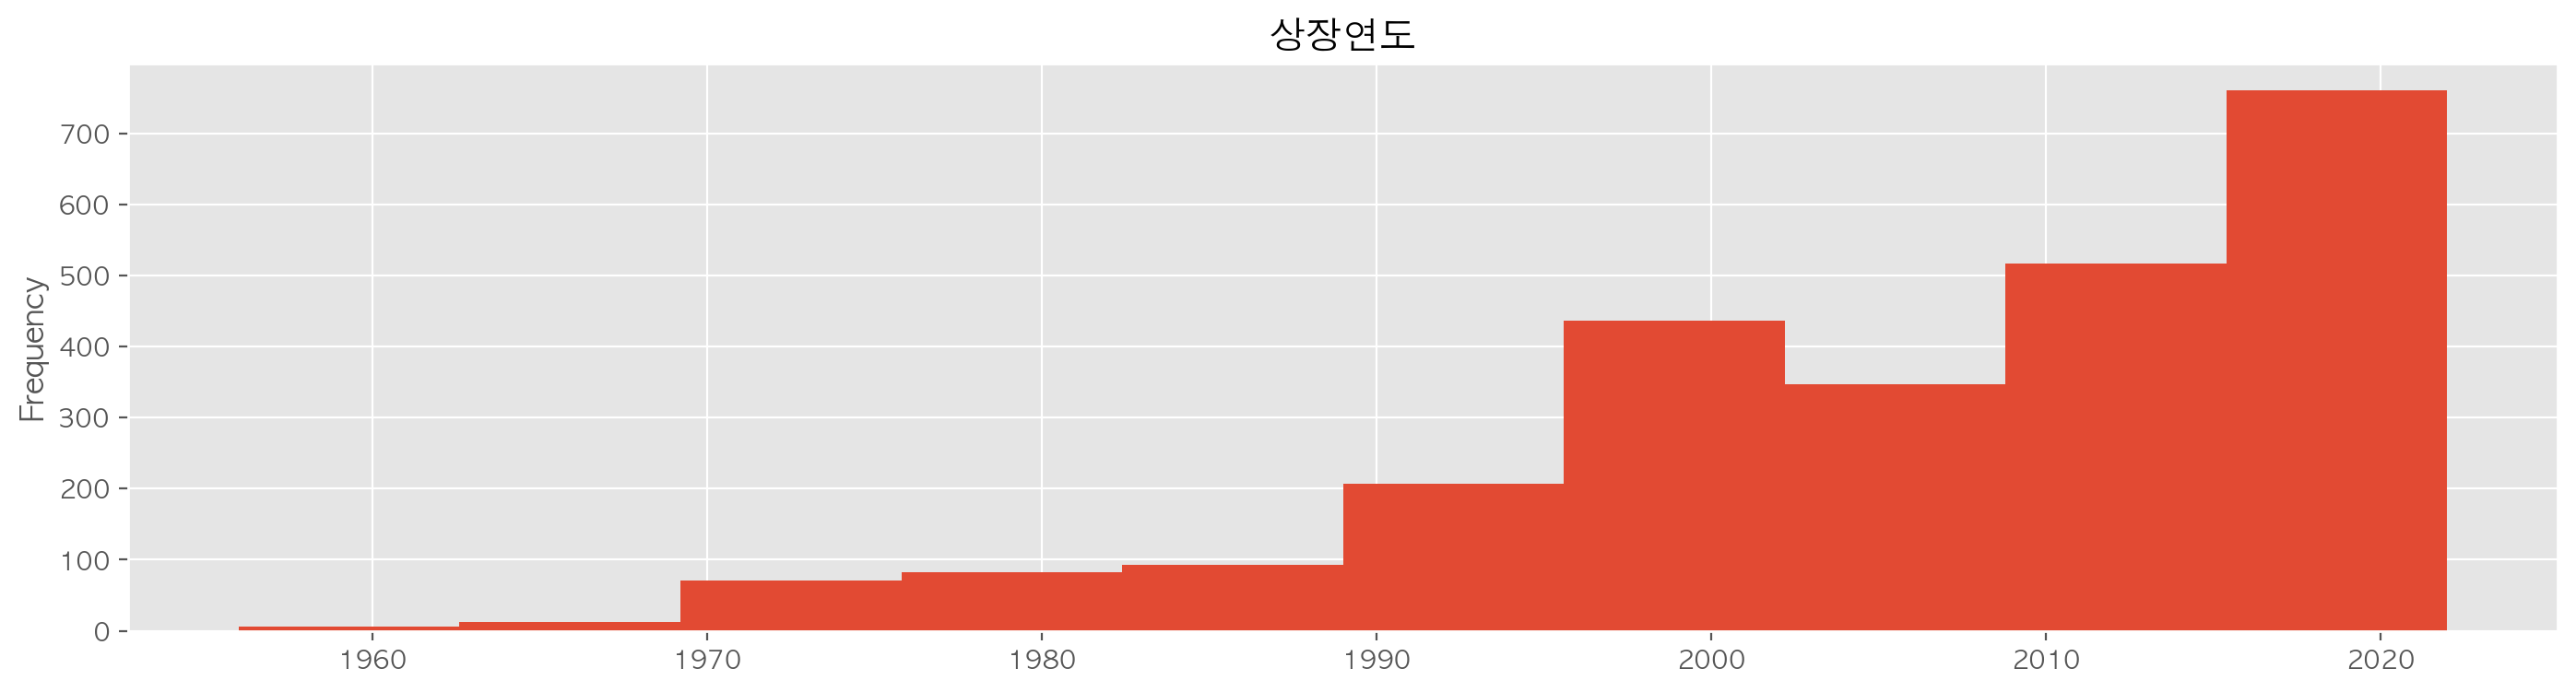

In [151]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라집니다.
df["ListingYear"].plot.hist(bins=10, figsize=(17, 4), title="상장연도")

## 데이터 색인

In [152]:
# 케이맨 제도에 있는 회사 찾기
df[df["Region"] == "케이맨 제도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
1956,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
1993,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
4810,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
5074,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
5730,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [153]:
# 1970년 이전에 상장한 기업을 찾습니다.
df[df["ListingYear"] < 1970]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
73,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,"강신호,민영학(각자대표)",http://www.cjlogistics.com,서울특별시,1956.0
95,001530,KOSPI,DI동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,"서태원, 손재선",http://www.dong-il.com,서울특별시,1964.0
1585,004250,KOSPI,NPC,플라스틱제품 제조업,"산업용기프라스틱제품(플라스틱 파렛트,시트 파렛트) 제조,판매",1969-09-08,12월,최병민,http://www.npc.co.kr,경기도,1969.0
1938,000050,KOSPI,경방,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시,1956.0
2218,001440,KOSPI,대한전선,절연선 및 케이블 제조업,"전력선,통신케이블,적산계기,스텐레스압연제품,광케이블,초고압선,알루미늄 제조,도매/전기공사",1968-12-27,12월,나형균,http://www.taihan.com,경기도,1968.0
2220,001790,KOSPI,대한제당,"곡물가공품, 전분 및 전분제품 제조업","제당,가축용 배합사료,설탕,기능성감미료(자일로올리고당),외식산 제조,도소매/부동산 임대",1968-12-27,12월,강승우,http://www.ts.co.kr,인천광역시,1968.0
2223,003490,KOSPI,대한항공,항공 여객 운송업,"여객운송,화물운송,항공기 제조,판매,정비수리/기내식 제조판매,면세품 판매",1966-03-18,12월,"조원태, 우기홍",http://www.koreanair.com,서울특별시,1966.0
2517,000060,KOSPI,메리츠화재,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시,1956.0
4066,000070,KOSPI,삼양홀딩스,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,"엄태웅, 이영준",http://www.samyang.com,서울특별시,1968.0
4165,002420,KOSPI,세기상사,연료 소매업,"극장(영화상영)/극영화,만화영화 제조/음식료품,일용잡화 소매/부동산 임대",1968-12-27,12월,조영준,http://daehancinema.com,서울특별시,1968.0


In [ ]:
# and => &
# or  => |

In [155]:
# 2021년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.
df[(df["ListingYear"] == 2021) & 
   (df["Region"] == "서울특별시") & 
   (df["Market"] == "KOSPI")]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
99,375500,KOSPI,DL이앤씨,토목 건설업,토목 건설 사업,2021-01-25,12월,마창민,NaN,서울특별시,2021.0
115,383220,KOSPI,F&F,봉제의복 제조업,"MLB, MLB KIDS, DISCOVERY 등 패션의류제품",2021-05-21,12월,김창수,http://www.fnf.co.kr,서울특별시,2021.0
1559,383800,KOSPI,LX홀딩스,기타 금융업,지주회사,2021-05-27,12월,"구본준, 노진서",http://www.lxholdings.co.kr,서울특별시,2021.0
1578,400760,KOSPI,NH올원리츠,부동산 임대 및 공급업,부동산투자,2021-11-18,12월,김범수,http://www.nhreits.com,서울특별시,2021.0
1648,395400,KOSPI,SK리츠,부동산 임대 및 공급업,서울 중구 소재 SK서린빌딩 및 전국 116개 주유소 임대 운영,2021-09-14,03월,에스케이리츠운용 주식회사,http://skreit.co.kr,서울특별시,2021.0
1651,402340,KOSPI,SK스퀘어,기타 금융업,지주회사,2021-11-29,12월,박정호,http://www.sksquare.com,서울특별시,2021.0
1653,361610,KOSPI,SK아이이테크놀로지,일차전지 및 축전지 제조업,2차전지용 습식 분리막 및 폴더블 커버 윈도우,2021-05-11,12월,노재석,http://www.skietechnology.com/,서울특별시,2021.0
2335,377190,KOSPI,디앤디플랫폼리츠,부동산 임대 및 공급업,부동산 투자 및 관리,2021-08-27,03월,이양원,http://dndplatformreit.com/,서울특별시,2021.0
3837,396690,KOSPI,미래에셋글로벌리츠,부동산 임대 및 공급업,부동산 임대업,2021-12-03,03월,신현준,NaN,서울특별시,2021.0
4758,404990,KOSPI,신한서부티엔디리츠,부동산 임대 및 공급업,부동산투자,2021-12-10,12월,승만호,http://shsbreit.com,서울특별시,2021.0


### 지역별 섹터

In [156]:
# Sector, Region 으로 crosstab 연산을 합니다.
df_sr = pd.crosstab(df["Sector"], df["Region"])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,세종특별자치시,싱가포르,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,0,0,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,11,12,0,0,0,5,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,0,0,1,0,1,0,0,0,6,0,0,0,0,0,0,1,0,0,0,0,0


### 컬럼과 인덱스 값으로 색인하기

In [157]:
# 특정 컬럼만 가져오기
df_sr[["서울특별시", "경기도", "인천광역시"]]

Region,서울특별시,경기도,인천광역시
Sector,,,
1차 비철금속 제조업,3,7,0
1차 철강 제조업,12,4,5
가구 제조업,3,4,1
가전제품 및 정보통신장비 소매업,2,0,0
가정용 기기 제조업,1,6,0
...,...,...,...
해상 운송업,5,0,0
"해체, 선별 및 원료 재생업",0,1,0
화학섬유 제조업,6,0,0


### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [160]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기
df_sr.loc["소프트웨어 개발 및 공급업"].sort_values(ascending=False)

Region
서울특별시      109
경기도         40
충청북도         2
홍콩           1
일본           1
경상남도         1
대전광역시        1
부산광역시        1
케이맨 제도       0
충청남도         0
제주특별자치도      0
전라북도         0
전라남도         0
강원도          0
인천광역시        0
울산광역시        0
세종특별자치시      0
미국           0
대구광역시        0
광주광역시        0
경상북도         0
싱가포르         0
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [161]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"]]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,세종특별자치시,싱가포르,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,40,1,0,0,0,1,0,1,109,0,0,0,0,1,0,0,0,0,2,0,1
금융 지원 서비스업,0,1,0,0,0,0,0,0,0,85,0,0,0,0,0,0,0,0,0,0,0,0
의약품 제조업,5,37,1,0,0,0,2,0,1,39,2,0,0,2,0,0,0,0,2,7,0,0


In [162]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], "서울특별시"]

Sector
소프트웨어 개발 및 공급업    109
금융 지원 서비스업         85
의약품 제조업            39
Name: 서울특별시, dtype: int64

In [163]:
# loc로 여러 행과 열 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], 
          ["서울특별시", "경기도", "인천광역시"]]

Region,서울특별시,경기도,인천광역시
Sector,,,
소프트웨어 개발 및 공급업,109,40,0
금융 지원 서비스업,85,1,0
의약품 제조업,39,37,2


<Axes: ylabel='Region'>

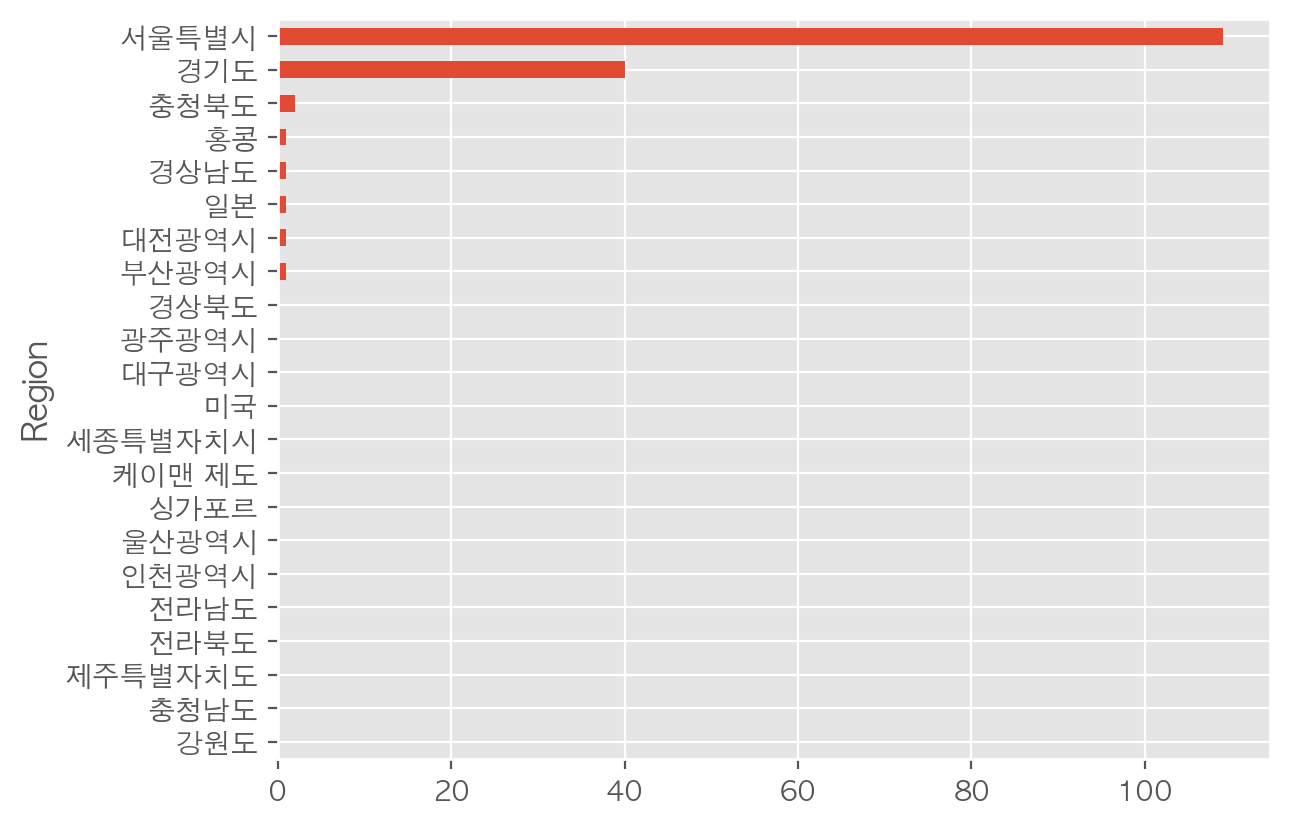

In [164]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.
df_sr.loc["소프트웨어 개발 및 공급업"].sort_values().plot.barh()

<Axes: ylabel='Region'>

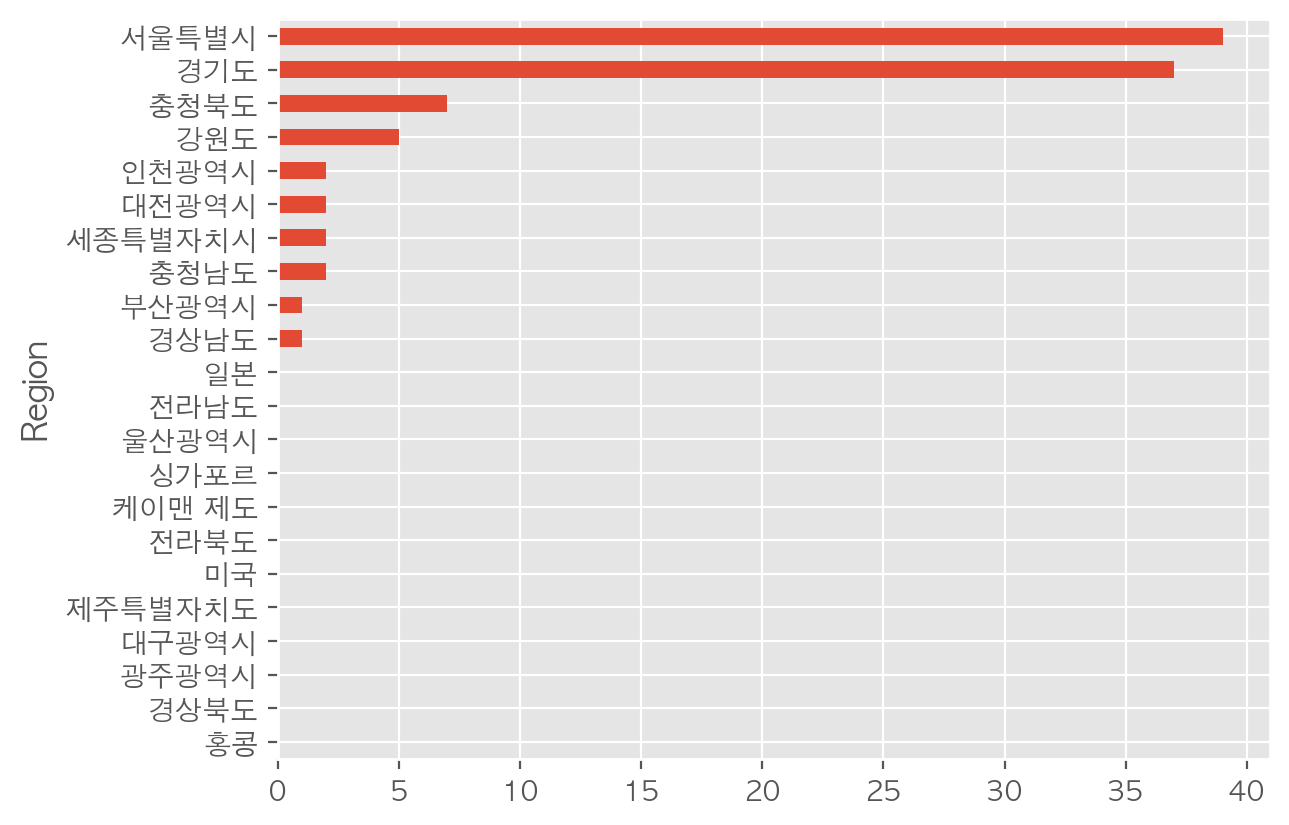

In [165]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.
df_sr.loc["의약품 제조업"].sort_values().plot.barh()

In [169]:
# iloc[행]
# iloc[행,열]
# df_sr.iloc[-5:, -5:]
df_sr.iloc[:, 0]

Sector
1차 비철금속 제조업            0
1차 철강 제조업              0
가구 제조업                 0
가전제품 및 정보통신장비 소매업      0
가정용 기기 제조업             0
                      ..
해상 운송업                 0
해체, 선별 및 원료 재생업        0
화학섬유 제조업               0
환경 정화 및 복원업            0
회사 본부 및 경영 컨설팅 서비스업    0
Name: 강원도, Length: 161, dtype: int64

In [170]:
df_sr.tail()

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,세종특별자치시,싱가포르,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,,
해상 운송업,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,0,0,1,0,1,0,0,0,6,0,0,0,0,0,0,1,0,0,0,0,0
환경 정화 및 복원업,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
회사 본부 및 경영 컨설팅 서비스업,0,2,0,0,0,1,0,0,2,8,0,0,0,0,0,0,0,0,0,0,0,0
